In [1]:
import pandas as pd
import numpy as np
from jsonschema.exceptions import relevance

kpis_1998_2003 = pd.read_csv('kpis_1998_2003.csv', low_memory=False)
print(kpis_1998_2003.shape)
kpis_1998_2003.head()

(1537131, 6)


kpi period municipality_id municipality_name      value  \
0  N00002   1998             114    Upplands Väsby  61.000001   
1  N00002   1998             115        Vallentuna  58.999997   
2  N00002   1998             117         Österåker  56.999999   
3  N00002   1998             120            Värmdö  52.999997   
4  N00002   1998             123          Järfälla       56.0   

                                            kpi_desc  
0  Personalkostnader kommunen totalt, dividerat m...  
1  Personalkostnader kommunen totalt, dividerat m...  
2  Personalkostnader kommunen totalt, dividerat m...  
3  Personalkostnader kommunen totalt, dividerat m...  
4  Personalkostnader kommunen totalt, dividerat m...

In [2]:
kpis_2004_2008 = pd.read_csv('kpis_2004_2008.csv', low_memory=False)
print(kpis_2004_2008.shape)
kpis_2004_2008.head()

(1580569, 6)


kpi period municipality_id municipality_name      value  \
0  N00002   2004             114    Upplands Väsby  56.999999   
1  N00002   2004             115        Vallentuna  49.000001   
2  N00002   2004             117         Österåker       56.0   
3  N00002   2004             120            Värmdö  55.000001   
4  N00002   2004             123          Järfälla  49.000001   

                                            kpi_desc  
0  Personalkostnader kommunen totalt, dividerat m...  
1  Personalkostnader kommunen totalt, dividerat m...  
2  Personalkostnader kommunen totalt, dividerat m...  
3  Personalkostnader kommunen totalt, dividerat m...  
4  Personalkostnader kommunen totalt, dividerat m...

In [3]:
kpis_2009_2011 = pd.read_csv('kpis_2009_2011.csv', low_memory=False)
print(kpis_2009_2011.shape)
kpis_2009_2011.head()

(1329703, 6)


kpi period municipality_id municipality_name      value  \
0  N00002   2009             114    Upplands Väsby       37.0   
1  N00002   2009             115        Vallentuna  46.000001   
2  N00002   2009             117         Österåker  46.000001   
3  N00002   2009             120            Värmdö  51.999998   
4  N00002   2009             123          Järfälla  47.999999   

                                            kpi_desc  
0  Personalkostnader kommunen totalt, dividerat m...  
1  Personalkostnader kommunen totalt, dividerat m...  
2  Personalkostnader kommunen totalt, dividerat m...  
3  Personalkostnader kommunen totalt, dividerat m...  
4  Personalkostnader kommunen totalt, dividerat m...

In [4]:
kpis_2012_2013 = pd.read_csv('kpis_2012_2013.csv', low_memory=False)
print(kpis_2012_2013.shape)
kpis_2012_2013.head()

(1048763, 6)


kpi period municipality_id municipality_name      value  \
0  N00002   2012             114    Upplands Väsby  29.481416   
1  N00002   2012             115        Vallentuna   45.36233   
2  N00002   2012             117         Österåker  41.470155   
3  N00002   2012             120            Värmdö  47.271466   
4  N00002   2012             123          Järfälla  45.784394   

                                            kpi_desc  
0  Personalkostnader kommunen totalt, dividerat m...  
1  Personalkostnader kommunen totalt, dividerat m...  
2  Personalkostnader kommunen totalt, dividerat m...  
3  Personalkostnader kommunen totalt, dividerat m...  
4  Personalkostnader kommunen totalt, dividerat m...

In [5]:
#merge datasets
kpis_1998_2013 = pd.concat([kpis_1998_2003, kpis_2004_2008, kpis_2009_2011, kpis_2012_2013], axis=0)

kpis_1998_2013.head()
print(kpis_1998_2013.shape)

(5496166, 6)


In [6]:
print(kpis_1998_2013['municipality_name'].nunique())



291


In [7]:
#merging all the related dataset for kpi 
municipality_indicators = pd.read_csv('municipality_indicators.csv', low_memory=False)

kpis_1998_2014 = pd.concat([kpis_1998_2013, municipality_indicators], axis=0)
print(kpis_1998_2014.shape)
municipality_indicators.head()

(6126120, 6)


kpi  period  municipality_id municipality_name      value  \
0  N00002    2014              114    Upplands Väsby  29.107607   
1  N00002    2014              115        Vallentuna  45.039772   
2  N00002    2014              117         Österåker  40.954784   
3  N00002    2014              120            Värmdö  47.924108   
4  N00002    2014              123          Järfälla  47.547227   

                                            kpi_desc  
0  Personalkostnader kommunen totalt, dividerat m...  
1  Personalkostnader kommunen totalt, dividerat m...  
2  Personalkostnader kommunen totalt, dividerat m...  
3  Personalkostnader kommunen totalt, dividerat m...  
4  Personalkostnader kommunen totalt, dividerat m...

In [8]:

#clean the data
print(kpis_1998_2014.columns)
print(kpis_1998_2014['period'].nunique())
print(kpis_1998_2014['municipality_name'].nunique())

kpis_1998_2014['value'] = pd.to_numeric(kpis_1998_2014['value'], errors='coerce')
kpis_1998_2014['value'] = kpis_1998_2014['value'].replace(["", "NaN", "None", "-"], np.nan)
mean_values_by_year = kpis_1998_2014.groupby('municipality_name')['value'].transform('mean')

kpis_1998_2014['value'] = kpis_1998_2014['value'].fillna(mean_values_by_year)
kpis_1998_2014['municipality_name'].value_counts()

print(kpis_1998_2014['value'].isnull().sum())


Index(['kpi', 'period', 'municipality_id', 'municipality_name', 'value',
       'kpi_desc'],
      dtype='object')
18
291
12


In [9]:
#remove unnecessary data
print(kpis_1998_2014.shape)
municipality_indicators_cleaned = kpis_1998_2014.drop(columns=['municipality_id', "kpi_desc", 'kpi'])

(6126120, 6)


In [10]:
#this can be used to merge the value
municipality_kpi_avg = municipality_indicators_cleaned.groupby('municipality_name')['value'].mean().reset_index()

municipality_kpi_avg.rename(columns={'municipality_name': 'municipality', 'value': 'kpi_value'}, inplace=True)

print(municipality_kpi_avg.head())
print(municipality_kpi_avg.shape)

  municipality    kpi_value
0          Ale  7951.523127
1     Alingsås  8029.432471
2      Alvesta  9203.841873
3        Aneby  6620.901410
4       Arboga  7819.197812
(291, 2)


0     2014
1     1998
2     1999
3     2000
4     2001
5     2002
6     2003
7     2004
8     2005
9     2006
10    2007
11    2008
12    2009
13    2010
14    2011
15    2012
16    2013
Name: period, dtype: object
0      5666.513561
1      5753.570556
2      5783.875967
3      6407.535859
4      7606.950101
5      8220.016416
6      8263.207567
7      9945.870596
8     10441.692940
9      9488.447014
10    10267.493926
11     8505.763748
12     7364.430492
13     8497.148459
14     8227.424274
15     8410.795002
16     7363.660780
Name: value, dtype: float64


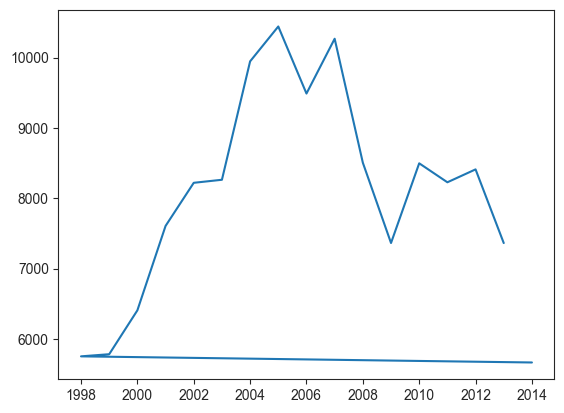

In [78]:
kpis_agg = municipality_indicators_cleaned.groupby(['municipality_name', 'period'])['value'].mean().reset_index()
# print(kpis_agg.shape)
# print(kpis_agg[kpis_agg['municipality_name'] == 'Ale'])
#we can print the whole municipality by time series data where the conditon is increasing or decreasing

from matplotlib import pyplot as plt

x = kpis_agg[kpis_agg['municipality_name'] == 'Ale']['period']
y = kpis_agg[kpis_agg['municipality_name'] == 'Ale']['value']

print(x)
print(y)

plt.plot(x,y)


In [12]:
kpis_count = municipality_indicators_cleaned.groupby(['municipality_name', 'period'])['value'].count().reset_index()
print(kpis_count[kpis_count['municipality_name'] == 'Ale'])

   municipality_name period  value
0                Ale   2014   2212
1                Ale   1998    761
2                Ale   1999    828
3                Ale   2000    881
4                Ale   2001    925
5                Ale   2002    964
6                Ale   2003    971
7                Ale   2004   1001
8                Ale   2005   1029
9                Ale   2006   1065
10               Ale   2007   1129
11               Ale   2008   1244
12               Ale   2009   1450
13               Ale   2010   1539
14               Ale   2011   1611
15               Ale   2012   1764
16               Ale   2013   1877


In [13]:
school_fire_cases_1998_2014 = pd.read_csv('school_fire_cases_1998_2014.csv')
print(school_fire_cases_1998_2014.shape)
school_fire_cases_1998_2014.head()

(4924, 4)


Municipality  Cases  Population  Year
0          Ale      0       25292  1998
1     Alingsås      0       34930  1998
2      Alvesta      0       19171  1998
3        Aneby      0        6806  1998
4       Arboga      0       14070  1998

In [14]:
print(school_fire_cases_1998_2014.columns)
print(school_fire_cases_1998_2014['Municipality'].nunique())

Index(['Municipality', 'Cases', 'Population', 'Year'], dtype='object')
290


In [15]:
school_fire_cases_1998_2014.isnull().sum()

Municipality    0
Cases           0
Population      0
Year            0
dtype: int64

In [16]:
school_fire_group_by_year_sum = school_fire_cases_1998_2014.groupby(['Municipality'])['Cases'].sum().reset_index()
print(school_fire_group_by_year_sum.head())
print(school_fire_group_by_year_sum.shape)
school_fire_group_by_year_sum.rename(columns={'Municipality': 'municipality', 'Cases': 'total_fire_cases'}, inplace=True)
print(school_fire_group_by_year_sum.shape)
#this can be plot to visualize the number of city which has higher fire cases

  Municipality  Cases
0          Ale     15
1     Alingsås      5
2      Alvesta      4
3        Aneby      1
4       Arboga      4
(290, 2)
(290, 2)


In [17]:
top_5_cities = school_fire_group_by_year_sum.nlargest(5, 'total_fire_cases')
print(top_5_cities)

    municipality  total_fire_cases
57      Göteborg               378
134        Malmö               218
198    Stockholm               176
69   Helsingborg               152
241      Uppsala                82


In [18]:
#Total cases per municipality per year
school_fire_agg = school_fire_cases_1998_2014.groupby(['Municipality', 'Year'])['Cases'].sum().reset_index()
print(school_fire_agg.head())



  Municipality  Year  Cases
0          Ale  1998      0
1          Ale  1999      0
2          Ale  2000      1
3          Ale  2001      1
4          Ale  2002      0


In [19]:
# Fire cases per capita
school_fire_cases_1998_2014['Cases_per_Capita'] = school_fire_cases_1998_2014['Cases'] / school_fire_cases_1998_2014['Population']
school_fire_agg_per_cap = school_fire_cases_1998_2014.groupby(['Municipality', 'Year'])['Cases_per_Capita'].mean().reset_index()
print(school_fire_agg_per_cap.tail())


     Municipality  Year  Cases_per_Capita
4919   Övertorneå  2010           0.00000
4920   Övertorneå  2011           0.00000
4921   Övertorneå  2012           0.00021
4922   Övertorneå  2013           0.00000
4923   Övertorneå  2014           0.00000


In [20]:
# Get the top 5 municipalities with the highest Cases per Capita
top_5_per_capita = school_fire_agg_per_cap.nlargest(5, 'Cases_per_Capita')
print(top_5_per_capita)

     Municipality  Year  Cases_per_Capita
1404         Håbo  2008          0.000416
905      Grästorp  2002          0.000342
4697        Åsele  2009          0.000319
2381     Mellerud  2004          0.000308
845        Gnesta  2010          0.000290


Municipality: The name of the municipality where the school fire cases were reported.

Cases: The number of school fire cases reported in that municipality during the given year.

Population: The population of the municipality during the year of the fire cases.

Year: The year in which the fire cases were recorded.

In [70]:
simplified_municipality_indicators = pd.read_csv('simplified_municipality_indicators.csv')
print(simplified_municipality_indicators.shape)
print(simplified_municipality_indicators.tail(100))
print(simplified_municipality_indicators['municipalityType'].unique())
print(simplified_municipality_indicators['municipalityTypeBroad'].unique())
print(simplified_municipality_indicators['governing'].unique())
print(simplified_municipality_indicators['governing'].value_counts())


(290, 34)
     code        name  medianIncome  youthUnemployment2010  \
190  1496      Skövde        208335                    9.9   
191   761     Lessebo        187284                   12.7   
192  2581       Piteå        201540                   13.5   
193  2181   Sandviken        197346                   15.5   
194  2080       Falun        204517                    8.8   
..    ...         ...           ...                    ...   
285   180   Stockholm        234360                    3.8   
286   126    Huddinge        222313                    4.2   
287   123    Järfälla        227460                    3.8   
288   138      Tyresö        239204                    3.5   
289   183  Sundbyberg        223160                    4.9   

     youthUnemployment2013  unemployment2010  unemployment2013  \
190                    8.9               8.4               7.3   
191                   18.1              11.0              12.2   
192                   10.9               9.1   

In [22]:
print(simplified_municipality_indicators.dtypes)

code                         int64
name                        object
medianIncome                 int64
youthUnemployment2010      float64
youthUnemployment2013      float64
unemployment2010           float64
unemployment2013           float64
unemploymentChange         float64
reportedCrime                int64
populationChange           float64
hasEducation               float64
asylumCosts                  int64
urbanDegree                float64
satisfactionInfluence       object
satisfactionGeneral         object
satisfactionElderlyCare     object
foreignBorn                float64
reportedCrimeVandalism     float64
youngUnskilled             float64
latitude                   float64
longitude                  float64
population                   int64
populationShare65plus      float64
municipalityType            object
municipalityTypeBroad       object
refugees                   float64
rentalApartments           float64
governing                   object
fokusRanking        

In [23]:
print(school_fire_cases_1998_2014['Municipality'].nunique())
print(municipality_indicators_cleaned['municipality_name'].nunique())
print(simplified_municipality_indicators['name'].nunique())

#so we can combine those together

290
291
290


In [24]:
print(school_fire_cases_1998_2014.info())
print(simplified_municipality_indicators.info())
print(municipality_indicators_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4924 entries, 0 to 4923
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Municipality      4924 non-null   object 
 1   Cases             4924 non-null   int64  
 2   Population        4924 non-null   int64  
 3   Year              4924 non-null   int64  
 4   Cases_per_Capita  4924 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 192.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     290 non-null    int64  
 1   name                     290 non-null    object 
 2   medianIncome             290 non-null    int64  
 3   youthUnemployment2010    290 non-null    float64
 4   youthUnemployment2013    290 non-null    float64
 5   unemploy

In [25]:
print(simplified_municipality_indicators.columns)
print(simplified_municipality_indicators.shape)

Index(['code', 'name', 'medianIncome', 'youthUnemployment2010',
       'youthUnemployment2013', 'unemployment2010', 'unemployment2013',
       'unemploymentChange', 'reportedCrime', 'populationChange',
       'hasEducation', 'asylumCosts', 'urbanDegree', 'satisfactionInfluence',
       'satisfactionGeneral', 'satisfactionElderlyCare', 'foreignBorn',
       'reportedCrimeVandalism', 'youngUnskilled', 'latitude', 'longitude',
       'population', 'populationShare65plus', 'municipalityType',
       'municipalityTypeBroad', 'refugees', 'rentalApartments', 'governing',
       'fokusRanking', 'foretagsklimatRanking', 'cars', 'motorcycles',
       'tractors', 'snowmobiles'],
      dtype='object')
(290, 34)


In [26]:
print(simplified_municipality_indicators.isnull().sum())

code                         0
name                         0
medianIncome                 0
youthUnemployment2010        0
youthUnemployment2013        0
unemployment2010             0
unemployment2013             0
unemploymentChange           0
reportedCrime                0
populationChange             0
hasEducation                 0
asylumCosts                  0
urbanDegree                  0
satisfactionInfluence      158
satisfactionGeneral        158
satisfactionElderlyCare    158
foreignBorn                  0
reportedCrimeVandalism       0
youngUnskilled               0
latitude                     0
longitude                    0
population                   0
populationShare65plus        0
municipalityType             0
municipalityTypeBroad        0
refugees                     0
rentalApartments             0
governing                    0
fokusRanking                 0
foretagsklimatRanking        0
cars                         0
motorcycles                  0
tractors

In [27]:
#satisfactionInfluence      158
#satisfactionGeneral        158
#satisfactionElderlyCare    158
# Those three feature has null value, is my option those are irrelevance so I can ignor those
simplified_municipality_indicators_cleaned = simplified_municipality_indicators.drop(columns=['satisfactionInfluence', 'satisfactionGeneral', 'satisfactionElderlyCare'])
print(simplified_municipality_indicators_cleaned.shape)


(290, 31)


In [28]:
from sklearn.preprocessing import LabelEncoder, label_binarize, OrdinalEncoder

le = LabelEncoder()
#simplified_municipality_indicators_cleaned['name'] = le.fit_transform(simplified_municipality_indicators_cleaned['name'])
simplified_municipality_indicators_cleaned['governing'] = le.fit_transform(simplified_municipality_indicators_cleaned['governing'])


In [29]:
# simplified_municipality_indicators['governing'] = pd.get_dummies(simplified_municipality_indicators, columns= ['governing'])

# oe = OrdinalEncoder()
# simplified_municipality_indicators_cleaned.loc[:,['municipalityType', 'municipalityTypeBroad']] = pd.DataFrame(oe.fit_transform(simplified_municipality_indicators_cleaned.loc[:,['municipalityType', 'municipalityTypeBroad']]))

# #Feature selection using correlation 
simplified_municipality_indicators_cleaned.rename(
    columns={
        'name': 'municipality', 
        'medianIncome': 'median_income', 
        'youthUnemployment2010': 'youth_unemployment_2010'  # Fixed space issue
    },
    inplace=True
)
simplified_municipality_indicators_cleaned_corr = simplified_municipality_indicators_cleaned.drop(columns=['municipalityType', 'municipalityTypeBroad', 'code', 'municipality'])

data_corr = simplified_municipality_indicators_cleaned_corr.corr()

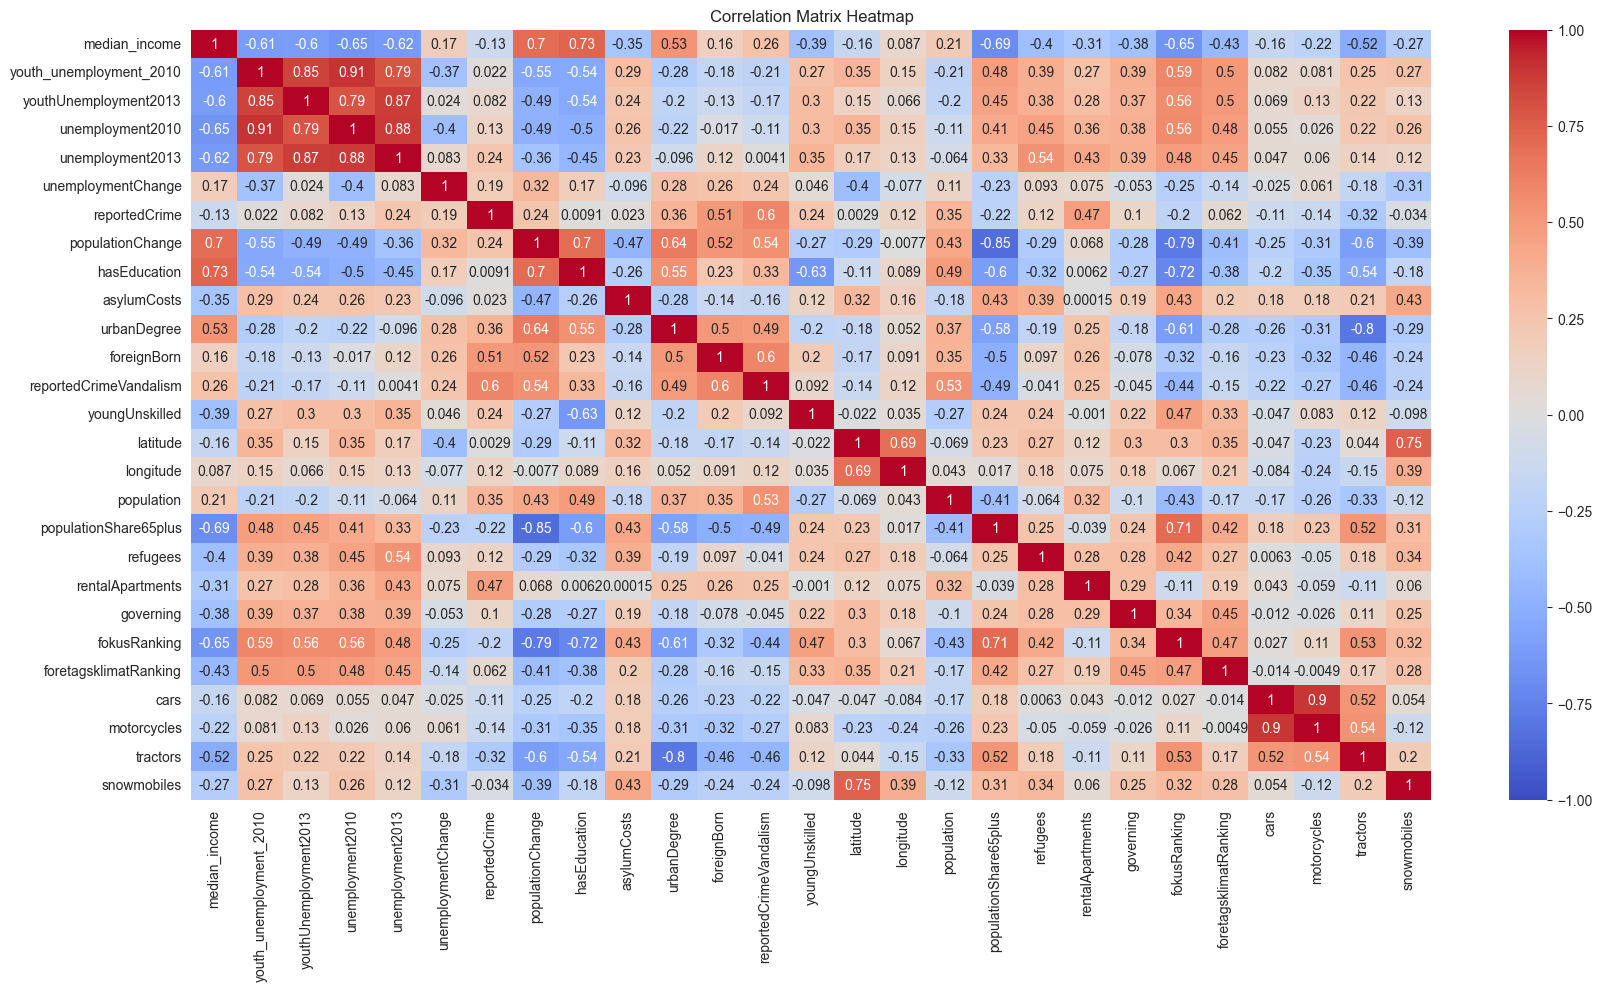

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(data_corr, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

According to my story "Fire Safety Crisis: Are Some Municipalities at Higher Risk?"

populationShare65plus, satisfactionInfluence, satisfactionGeneral, tractors, motorcycles, snowmobiles, cars seems irrelevance.


In [31]:
# relevant feature with reported crime 
# Identify features strongly correlated with 'reportedCrime'
relevance_feature_with_crime = [
    col for col in data_corr.columns if abs(data_corr[col]['reportedCrime']) > 0.2 and col != 'reportedCrime'
]

print(f"Relevant features related to reported crime: {relevance_feature_with_crime}")
print(len(relevance_feature_with_crime))


Relevant features related to reported crime: ['unemployment2013', 'populationChange', 'urbanDegree', 'foreignBorn', 'reportedCrimeVandalism', 'youngUnskilled', 'population', 'populationShare65plus', 'rentalApartments', 'fokusRanking', 'tractors']
11


In [32]:
np.fill_diagonal(data_corr.values, 0)
high_corr_cols = [col for col in data_corr.columns if any(data_corr[col] > 0.50)]
print(f"Highly correlated columns: {high_corr_cols}")
print(len(high_corr_cols))

Highly correlated columns: ['median_income', 'youth_unemployment_2010', 'youthUnemployment2013', 'unemployment2010', 'unemployment2013', 'reportedCrime', 'populationChange', 'hasEducation', 'urbanDegree', 'foreignBorn', 'reportedCrimeVandalism', 'latitude', 'longitude', 'population', 'populationShare65plus', 'refugees', 'fokusRanking', 'foretagsklimatRanking', 'cars', 'motorcycles', 'tractors', 'snowmobiles']
22


In [33]:
simplified_data = simplified_municipality_indicators_cleaned.drop(columns=["populationShare65plus", "tractors", "motorcycles", "snowmobiles", "cars", 'municipalityType', 'code'])

In [34]:
print(simplified_data.head())

simplified_data.rename(
    columns={
        'name': 'municipality', 
        'medianIncome': 'median_income', 
        'youthUnemployment2010': 'youth_unemployment_2010'  # Fixed space issue
    },
    inplace=True
)

  municipality  median_income  youth_unemployment_2010  youthUnemployment2013  \
0        Växjö         201793                      9.3                    8.7   
1   Vänersborg         195999                     13.7                   13.2   
2       Årjäng         182826                      6.4                    5.5   
3   Hässleholm         237817                     10.4                   13.1   
4     Bjurholm         168796                      7.1                   11.5   

   unemployment2010  unemployment2013  unemploymentChange  reportedCrime  \
0               7.9               8.0                 0.1            831   
1               9.5               9.4                -0.1            641   
2               7.2               5.3                -1.9            575   
3               9.1               9.6                 0.5            751   
4               6.7              10.2                 3.5            205   

   populationChange  hasEducation  ...  youngUnskilled  

According to our plan, we have three major dataset, School Fire Cases from 1998 to 2014, Municipality Indicators and Simplified Municipality Indicators. 

For, School Fire, we will visualize the school fire cases by municipality and also year by year, like in 2011 to 2012 is the fire cases increased to decresed. If the data includes geographical information (e.g., coordinates or regions), you can map fire cases and other indicators to regions.

For Municipality Indicators, based on the KPI, we can determine the best municipal or ranking the municipal based on the KPI. Another any we can visualize how much KPI changes over the years for all the municipality

Combined :  To show comparisons between municipality indicators and school fire cases (e.g., fire cases by unemployment rate, income, or municipality type).

For simplified municipality indicators, we have 34 features. 

Is income level has an impact on crime rate?
unemployment or youth unemployment is impacted reported crime?
Is number of population is a big factor for crime?
HasEducation, youngUnskilled is a factor for crime?
We can draw a map as latitude and longitude is given.

governing also can be a factors


Does higher unemployment or crime rate correlate with more school fire cases?
Does higher income correlate with fewer school fire cases?
Larger municipalities may have more fire cases simply due to population size.

KPI Descriptions and Fire Cases?

Step 1: Understand the Context and Features
Municipality Indicators Dataset: This dataset includes features like median income, unemployment rates, crime rates, population change, and more for different municipalities.
School Fire Cases Dataset: This dataset includes data on school fire cases in different municipalities, including the number of cases and population for each year.
Your goal is to identify any potential correlations or relationships between the municipality indicators (e.g., unemployment, crime rate) and the school fire cases (e.g., number of cases, population).

Step 2: Check for Relevant Variables
Identify which variables in the simplified municipality indicators dataset might be relevant to the number of school fire cases. Some potential relationships could include:

Median Income: Could there be a relationship between fire cases and wealth of the municipality?
Youth Unemployment: Could youth unemployment be linked to an increase in incidents like fires in schools?
Reported Crime: High crime rates could potentially correlate with higher school fire cases in certain areas.
Population Size: Larger populations might have more incidents due to the sheer number of people and schools.
Municipality Type: Could the type of municipality (urban vs. rural) impact the frequency of school fires?

In [35]:
#feasibility
simplified_data.describe()

median_income  youth_unemployment_2010  youthUnemployment2013  \
count     290.000000               290.000000             290.000000   
mean   197621.689655                10.195172               9.993448   
std     21027.907219                 3.870004               3.642757   
min    164708.000000                 1.200000               1.200000   
25%    184184.500000                 7.625000               7.525000   
50%    193760.500000                10.150000              10.000000   
75%    203771.500000                12.875000              12.800000   
max    304084.000000                26.300000              20.200000   

       unemployment2010  unemployment2013  unemploymentChange  reportedCrime  \
count        290.000000        290.000000          290.000000     290.000000   
mean           8.016552          7.398966           -0.617586     819.206897   
std            2.421244          2.225264            1.155729     285.116692   
min            2.500000          2.100000           -5.300000     194.000000   
25%            6.500000          5.900000           -1.200000     619.500000   
50%            7.950000          7.350000           -0.600000     792.000000   
75%            9.475000          8.900000            0.100000     991.250000   
max           17.200000         13.100000            3.500000    1776.000000   

       populationChange  hasEducation   asylumCosts  ...  \
count        290.000000    290.000000    290.000000  ...   
mean           0.839310     31.874138   1131.200000  ...   
std            4.027927      9.614582   1515.175064  ...   
min           -9.600000     19.300000     -7.000000  ...   
25%           -2.175000     25.100000    362.750000  ...   
50%            0.350000     29.300000    684.500000  ...   
75%            3.600000     35.700000   1351.500000  ...   
max           18.100000     73.500000  15446.000000  ...   

       reportedCrimeVandalism  youngUnskilled    latitude   longitude  \
count              290.000000      290.000000  290.000000  290.000000   
mean                11.144828       10.306207   59.299078   15.381062   
std                  4.733740        2.662029    2.670355    2.504071   
min                  4.100000        3.000000   55.376243   11.179187   
25%                  8.125000        8.400000   57.656068   13.410145   
50%                 10.000000       10.300000   59.012082   15.047291   
75%                 12.600000       12.000000   60.057374   17.074070   
max                 39.200000       19.100000   67.855800   24.127664   

          population    refugees  rentalApartments   governing  fokusRanking  \
count     290.000000  290.000000        290.000000  290.000000    290.000000   
mean    33258.151724   20.430062        142.961034    1.024138    145.558621   
std     68230.370938   15.885837         45.562028    0.882022     83.861220   
min      2436.000000    0.300000         14.100000    0.000000      1.000000   
25%      9690.250000    9.575000        114.550000    0.000000     73.500000   
50%     15281.500000   17.850000        142.600000    1.000000    145.500000   
75%     33662.000000   26.000000        170.500000    2.000000    217.750000   
max    897700.000000  158.600000        277.700000    2.000000    290.000000   

       foretagsklimatRanking  
count             290.000000  
mean              145.496552  
std                83.860209  
min                 1.000000  
25%                73.250000  
50%               145.500000  
75%               217.750000  
max               290.000000  

[8 rows x 22 columns]

Negative: But umploementChanged and populationChanged which has negative value. For unemployement and populationChange it is feasible becuase instead of increasing population, population can decrease and also same for unemployement.

Outlier: For the above all the features, there are many extreme values, but according to the nature of the features, we will keep those, as those extreme data will help us in visualization. As there might be higher population, median income, youth unemployement, reported crimes, refugees and rental appartment holder in some cities, those outlier will give us interesting result, so I decided to keep them.

In [36]:
school_fire_cases_1998_2014.describe()

Cases     Population         Year  Cases_per_Capita
count  4924.000000    4924.000000  4924.000000       4924.000000
mean      0.627132   31722.727457  2006.007717          0.000013
std       2.154004   61907.150923     4.897190          0.000032
min       0.000000    2421.000000  1998.000000          0.000000
25%       0.000000    9903.750000  2002.000000          0.000000
50%       0.000000   15281.000000  2006.000000          0.000000
75%       0.000000   32712.750000  2010.000000          0.000000
max      48.000000  911989.000000  2014.000000          0.000416

This dataset looks okay as cases can be higher in some cities.

In [37]:
municipality_indicators_cleaned.describe()

value
count  6.126108e+06
mean   8.209665e+03
std    4.990047e+04
min   -2.919225e+05
25%    1.285717e+01
50%    8.400000e+01
75%    1.136000e+03
max    2.499600e+07

Some municipality have higher kpi value than mean value. It's natural. But the negative value seems confusing. but after reading the description for KPI, I got that KPI is "Total municipal personnel costs, divided by the municipality's operating costs" 
So, personal costs or municipality's operating costs can not be negative. So, we will remove those value from the datasets.


In [38]:
municipality_indicators_cleaned_remove_negative = municipality_indicators_cleaned[municipality_indicators_cleaned['value'] > 0]
print(municipality_indicators_cleaned_remove_negative.shape)
municipality_indicators_cleaned_remove_negative.describe().map(lambda x: '{:.6f}'.format(x))


(5573494, 3)


value
count   5573494.000000
mean       9203.586023
std       52138.744548
min           0.000017
25%          25.185552
50%         100.000000
75%        1714.000000
max    24996000.000000

Now, it's looks clean and data within range. we will not remove any outlier here.

In [39]:
#this can be used to merge the value
municipality_kpi_avg = municipality_indicators_cleaned_remove_negative.groupby('municipality_name')['value'].mean().reset_index()

municipality_kpi_avg.rename(columns={'municipality_name': 'municipality', 'value': 'kpi_value'}, inplace=True)

print(municipality_kpi_avg.head())
print(municipality_kpi_avg.shape)

  municipality     kpi_value
0          Ale   8861.862129
1     Alingsås   8817.898117
2      Alvesta  10291.189532
3        Aneby   7691.469659
4       Arboga   8667.671434
(290, 2)


In [40]:
print(simplified_data.head())

  municipality  median_income  youth_unemployment_2010  youthUnemployment2013  \
0        Växjö         201793                      9.3                    8.7   
1   Vänersborg         195999                     13.7                   13.2   
2       Årjäng         182826                      6.4                    5.5   
3   Hässleholm         237817                     10.4                   13.1   
4     Bjurholm         168796                      7.1                   11.5   

   unemployment2010  unemployment2013  unemploymentChange  reportedCrime  \
0               7.9               8.0                 0.1            831   
1               9.5               9.4                -0.1            641   
2               7.2               5.3                -1.9            575   
3               9.1               9.6                 0.5            751   
4               6.7              10.2                 3.5            205   

   populationChange  hasEducation  ...  youngUnskilled  

In [41]:
print(school_fire_group_by_year_sum.shape)

(290, 2)


In [42]:
#we will merge those three dataset
#for municipality we took the avg

# Merge the first two datasets on 'municipality'

# Convert 'municipality' column to string in all datasets
municipality_kpi_avg['municipality'] = municipality_kpi_avg['municipality'].astype(str)
simplified_data['municipality'] = simplified_data['municipality'].astype(str)
school_fire_group_by_year_sum['municipality'] = school_fire_group_by_year_sum['municipality'].astype(str)

print(school_fire_group_by_year_sum.shape)
print(municipality_kpi_avg.shape)
print(simplified_data.shape)

# # # Now merge the datasets
merged_data = pd.merge(municipality_kpi_avg, school_fire_group_by_year_sum, on='municipality', how='outer')
print(merged_data.shape)

merged_data = pd.merge(merged_data, simplified_data, on='municipality', how='outer')
print(merged_data.shape)


(290, 2)
(290, 2)
(290, 24)
(290, 3)
(290, 26)


In [43]:
print(municipality_kpi_avg['municipality'].duplicated().sum())  
print(simplified_data['municipality'].duplicated().sum())  
print(school_fire_group_by_year_sum['municipality'].duplicated().sum())  


0
0
0


In [44]:
import pickle
import openpyxl

d_out=open("school_fire_total_feature","wb") #"wb" defines the writing mode for the file
pickle.dump(merged_data,d_out) #dump the content of the variables into the file
d_out.close()

In [45]:
with pd.ExcelWriter('school_fire_total_feature.xlsx') as writer:
    merged_data.to_excel(writer, sheet_name='total_features')

In [71]:
merged_data.rename(
    columns={
    'kpi_value': 'KPI Value',
    'total_fire_cases': 'Total Fire Cases',
    'median_income': 'Median Income',
    'youth_unemployment_2010': 'Youth Unemployment (2010)',
    'youthUnemployment2013': 'Youth Unemployment (2013)',
    'unemployment2010': 'Unemployment Rate (2010)',
    'unemployment2013': 'Unemployment Rate (2013)',
    'unemploymentChange': 'Unemployment Change',
    'reportedCrime': 'Total Reported Crimes',
    'populationChange': 'Population Change',
    'hasEducation': 'Education Availability',
    'asylumCosts': 'Asylum Costs',
    'urbanDegree': 'Urbanization Degree',
    'foreignBorn': 'Foreign-Born Population',
    'reportedCrimeVandalism': 'Reported Vandalism Cases',
    'youngUnskilled': 'Unskilled Youth Population',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'population': 'Total Population',
    'refugees': 'Refugee Population',
    'rentalApartments': 'Number of Rental Apartments',
    'municipalityTypeBroad': 'Municipality Type Broad'
}, inplace=True)

columns_with_catgorical = ['municipality', 'fokusRanking', 'governing', 'foretagsklimatRanking']
columns = [col for col in merged_data.columns if col not in columns_with_catgorical]
print(columns)


print(print(merged_data['governing'].value_counts()))


['KPI Value', 'Total Fire Cases', 'Median Income', 'Youth Unemployment (2010)', 'Youth Unemployment (2013)', 'Unemployment Rate (2010)', 'Unemployment Rate (2013)', 'Unemployment Change', 'Total Reported Crimes', 'Population Change', 'Education Availability', 'Asylum Costs', 'Urbanization Degree', 'Foreign-Born Population', 'Reported Vandalism Cases', 'Unskilled Youth Population', 'Latitude', 'Longitude', 'Total Population', 'Municipality Type Broad', 'Refugee Population', 'Number of Rental Apartments']
governing
2    116
0    109
1     65
Name: count, dtype: int64
None


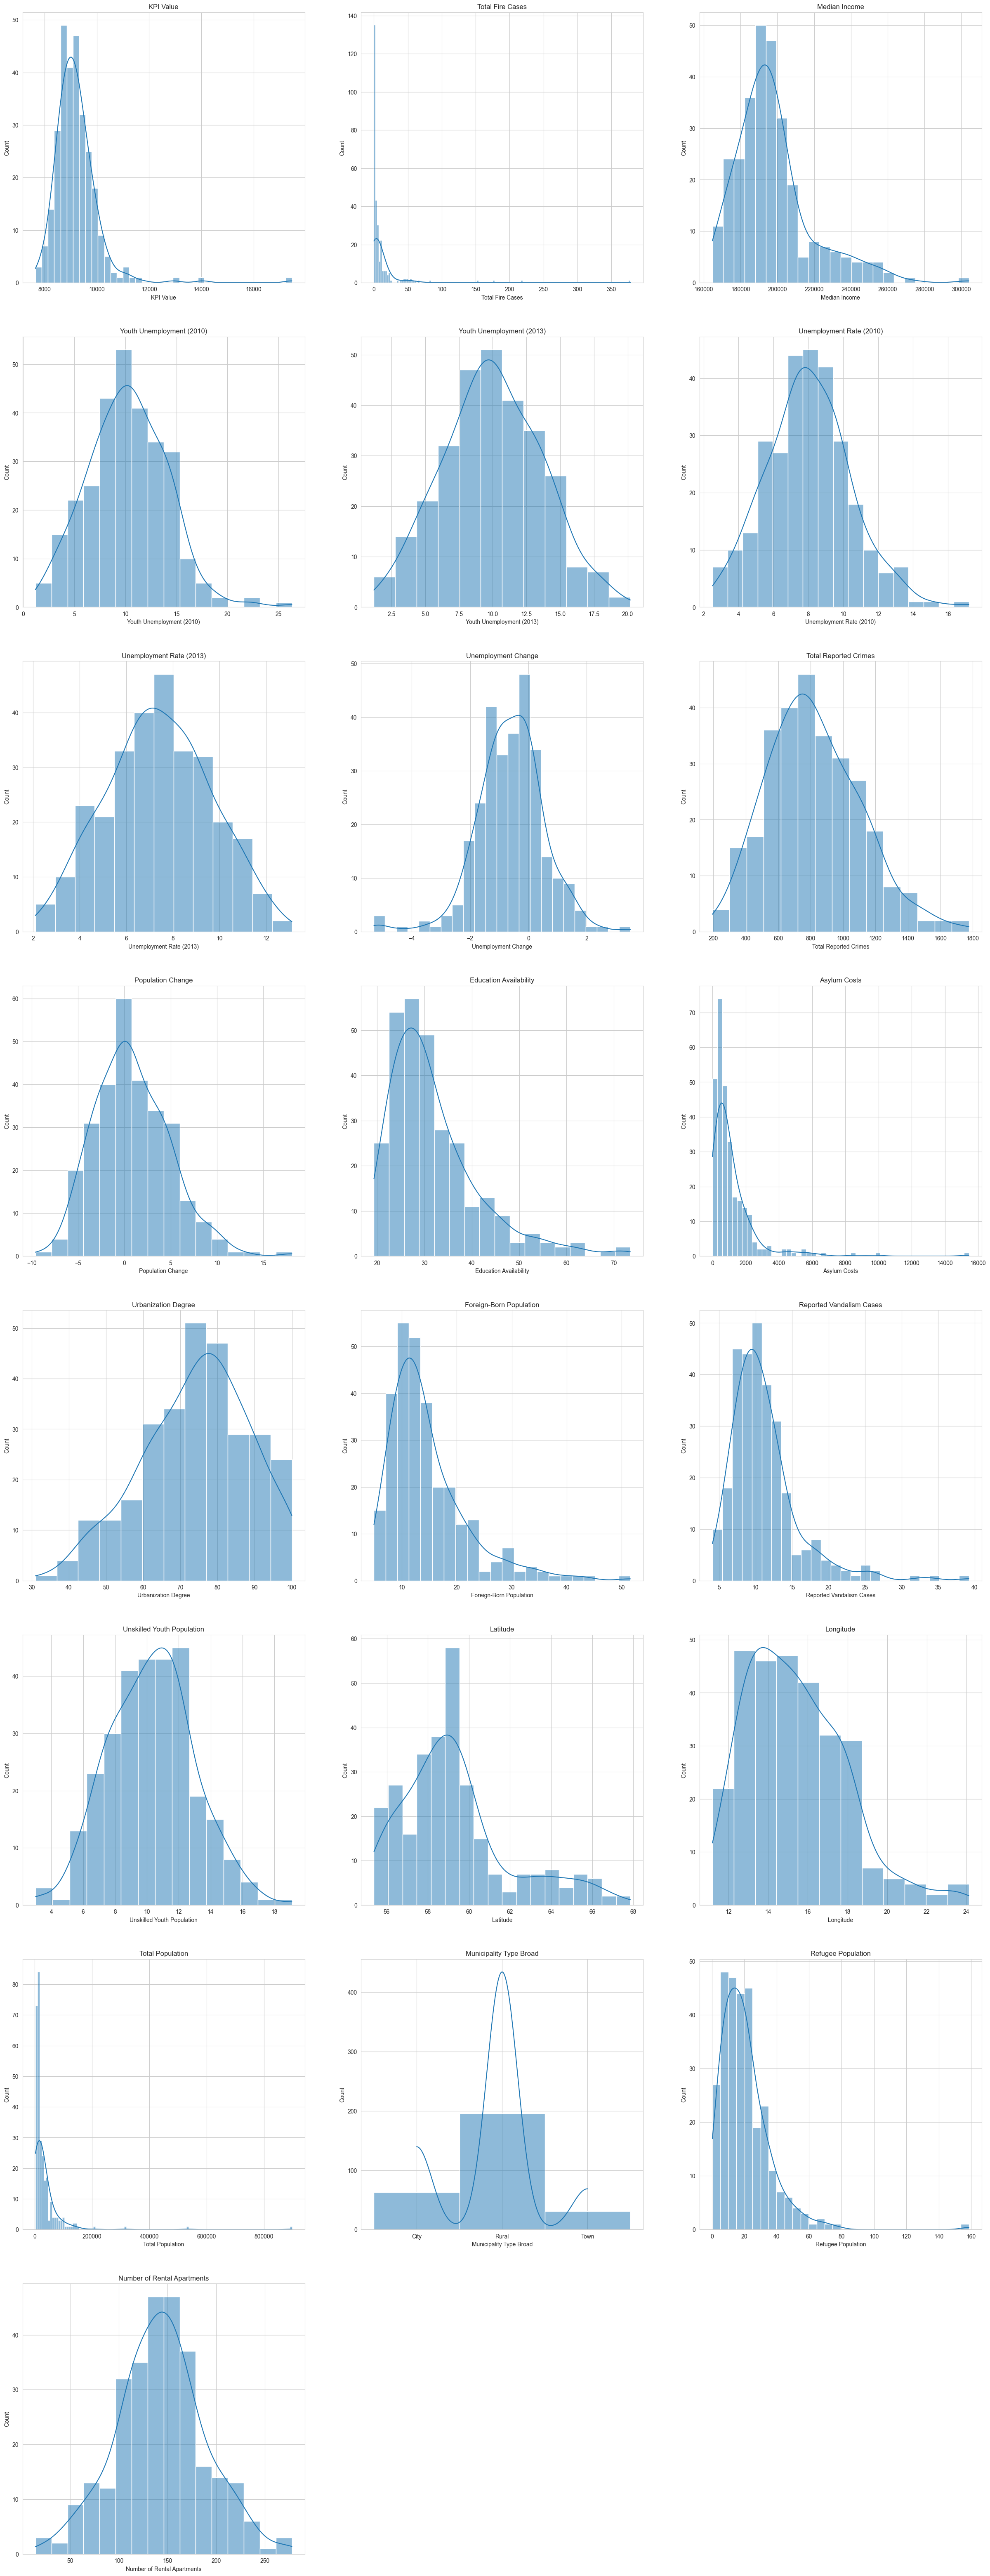

In [47]:
fig=plt.figure(figsize=(30,80)) #16 plots in 2 columns =>8 rows
i=1
for col in columns:
    plt.subplot(8,3,i)
    #combination of histogram and KDE with seaborns histplot()
    sns.histplot(x=merged_data[col], kde=True)
    plt.title(col) #setting title of the histogram to the name of the column
    i=i+1
plt.savefig('histogram_kde.png', bbox_inches='tight')


The dataset shows that unemployment rates (2010 & 2013), urbanization level, unskilled youth population, rental apartments, and youth unemployment rates exhibit a unimodal distribution, meaning most data points are concentrated around a central value. These variables follow a near-normal pattern, making them suitable for standard statistical analysis.

On the other hand, reported crime, total fire cases, asylum costs, refugee population, median income, reported vandalism cases, urbanization level, foreign-born population, education level, and KPI value contain outliers, meaning some municipalities have extreme values compared to the majority. Skewed variables, such as total crime count, latitude, longitude, and asylum costs, have long tails, indicating that most municipalities fall within a small range, while a few have significantly different values. Population change and reported crime show clusters or gaps, suggesting distinct groups of municipalities with different trends. To improve modeling, outliers should be handled carefully, skewed variables may require log transformations, and multimodal distributions might benefit from clustering analysis.

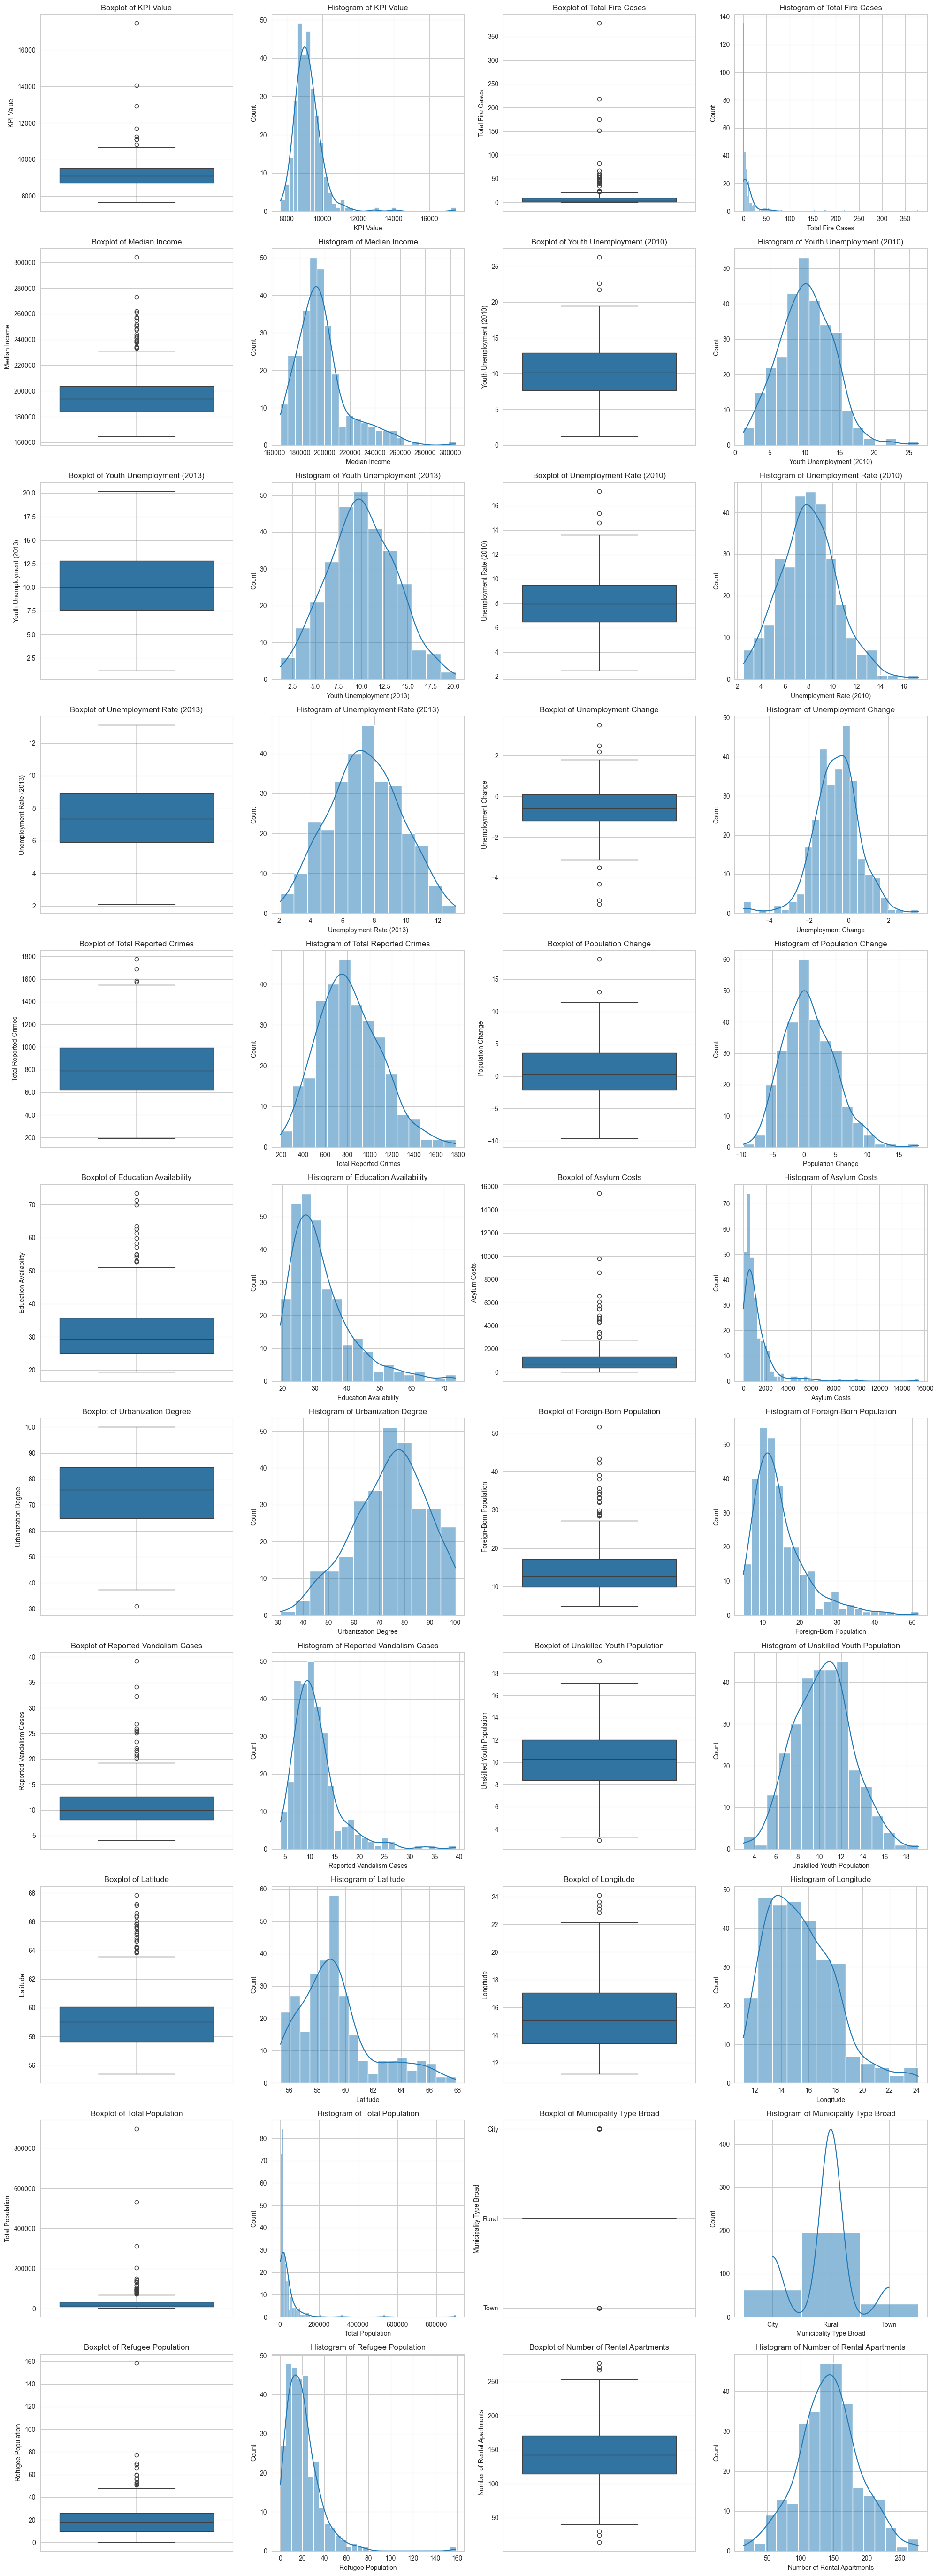

In [48]:
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20, 55))  # Creating an 11x4 subplot grid to accommodate 21 features
axes = axes.flatten()  # Flattening axes to easily iterate

for i, col in enumerate(columns):
    # Boxplot
    sns.boxplot(y=merged_data[col], ax=axes[i*2])
    axes[i*2].set_title(f'Boxplot of {col}')
    
    # Histogram with KDE
    sns.histplot(merged_data[col], kde=True, ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Histogram of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('box_and_histogram.png', bbox_inches='tight')

These variables have several extreme points outside the whiskers, indicating the presence of outliers:

KPI Value → Outliers in both low and high ranges. For this, we will Clip Values to Whisker Max or Min.
Total Fire Cases → Some municipalities have extremely high fire cases. It's okay because some municipality can have higher fire cases than average.
Median Income → Large variation with extreme values in wealthier municipalities. it's feasible as some municipality can have higher median income
Total Reported Crimes → Some municipalities have far higher crime rates than the rest. it's also okay.
Population Change → Some municipalities show extreme population growth or decline. it's also possible.
Asylum Costs → Extreme cases where certain municipalities spend significantly more. it's also possible as there might be hgiher asylum, so cost is higher for that municipality.
Foreign-Born Population → Some municipalities have much higher foreign-born percentages. it's also okay.
Reported Vandalism Cases → Large differences in crime rates. it's also okay
Latitude & Longitude → Some municipalities are geographically extreme. okay
Total Population → Extreme variations between small and large municipalities. okay
Refugee Population → Some municipalities have significantly higher refugee populations. it's also okay.

In [49]:
def clip_outliers(df, columns):
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

columns_outlier = ['KPI Value', 'Number of Rental Apartments', 'Population Change']
final_merge_data = clip_outliers(merged_data, columns_outlier)


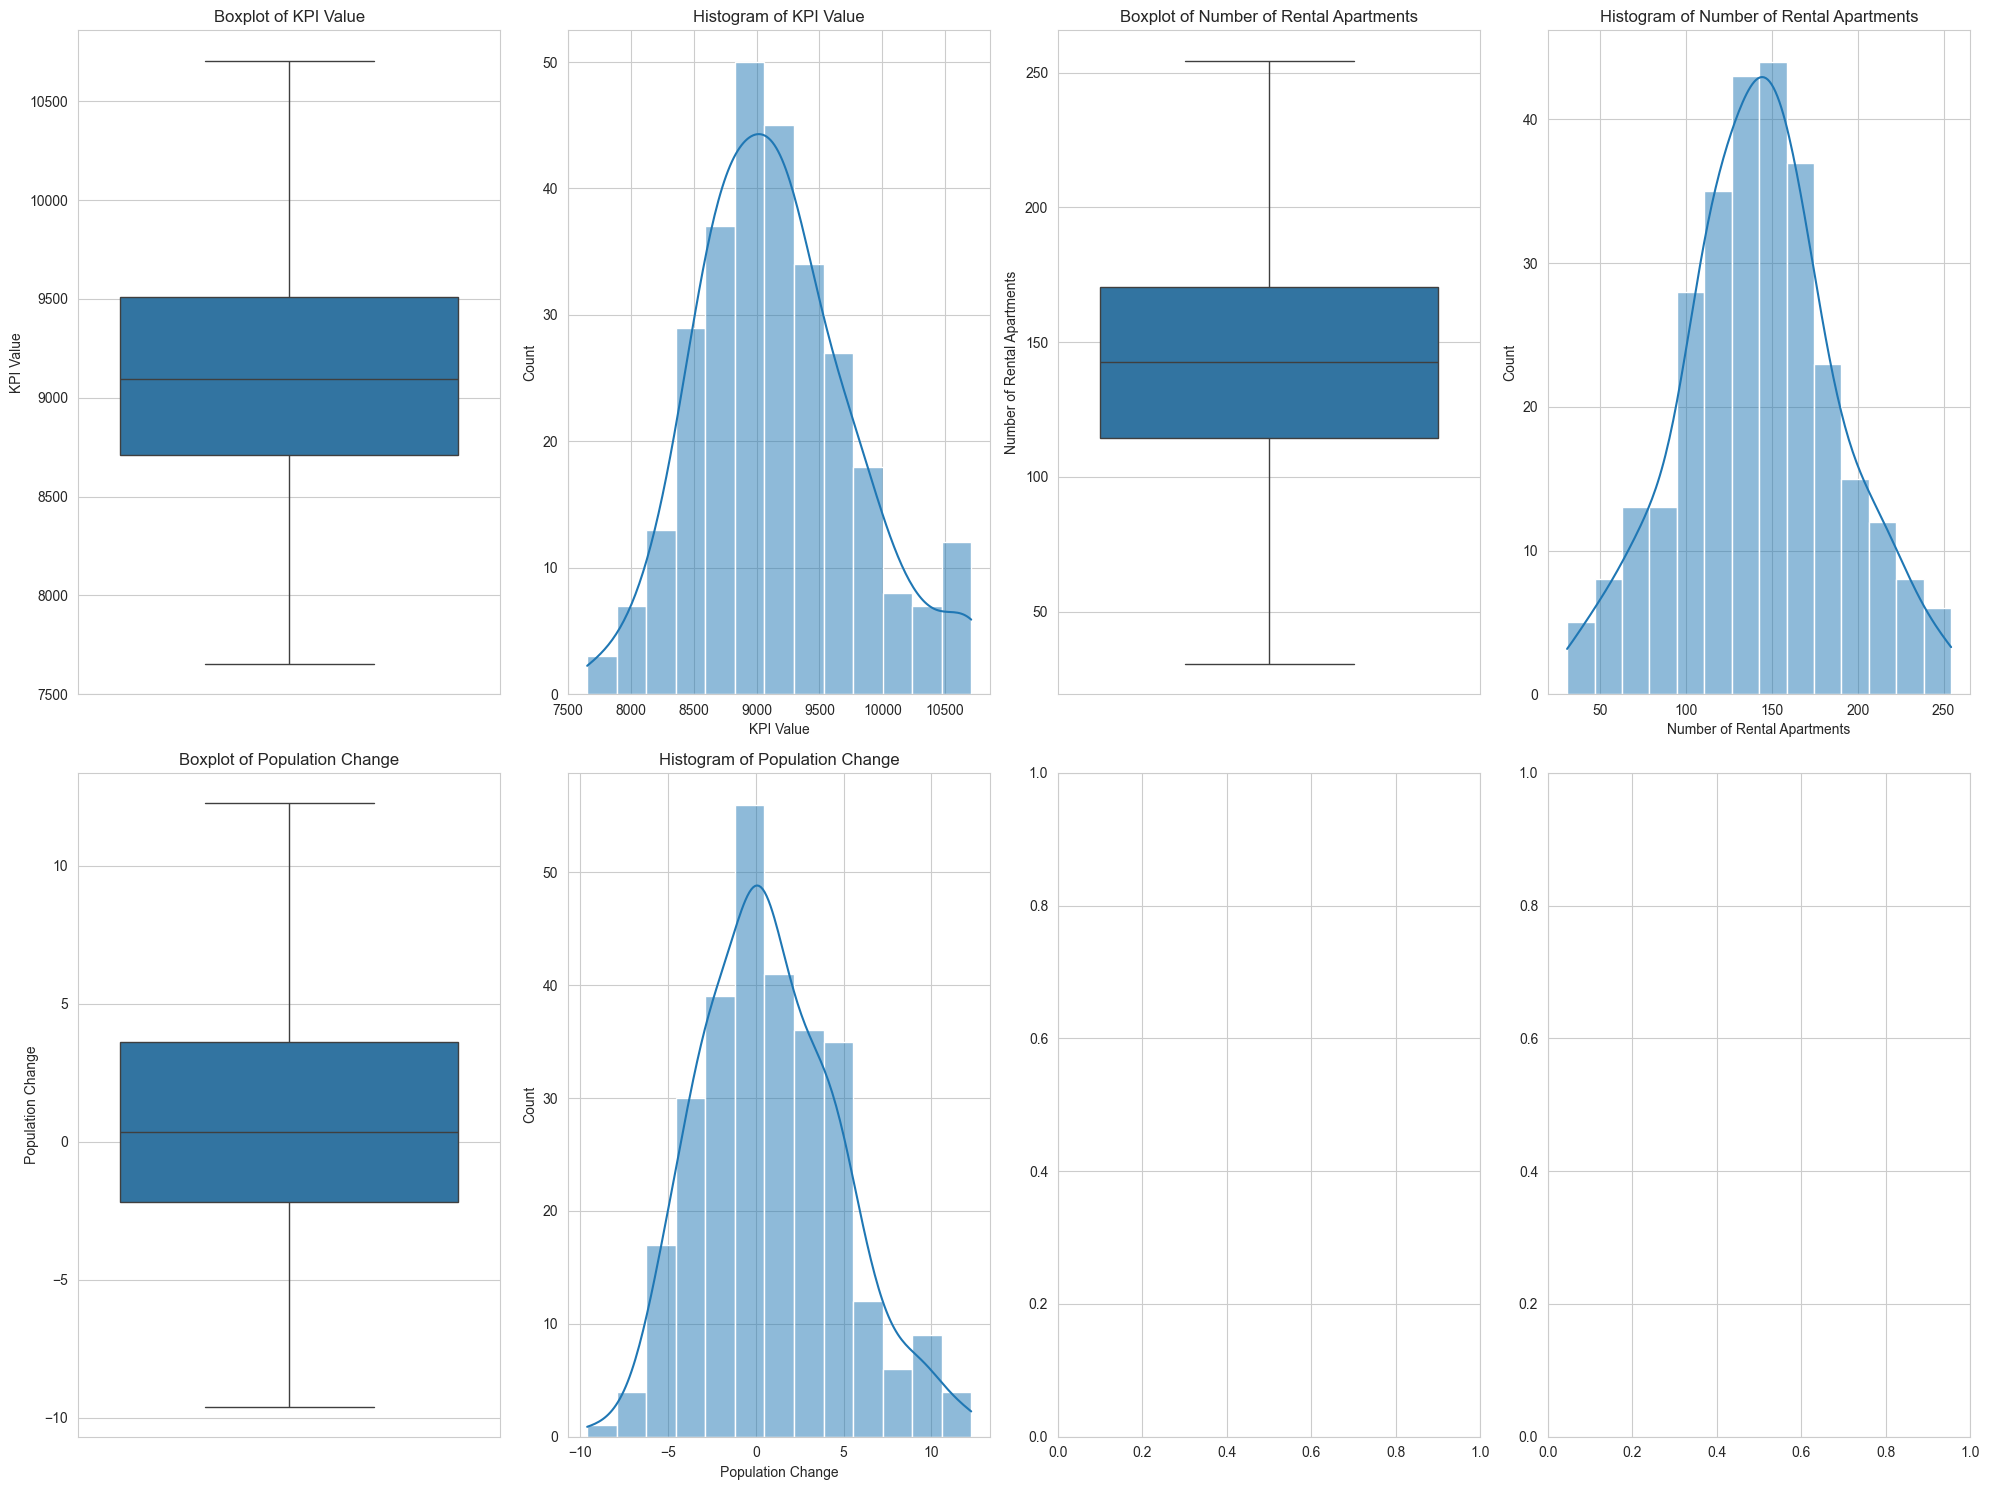

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 15))  # Creating an 11x4 subplot grid to accommodate 21 features
axes = axes.flatten()  # Flattening axes to easily iterate
for i, col in enumerate(columns_outlier):
    # Boxplot
    sns.boxplot(y=merged_data[col], ax=axes[i*2])
    axes[i*2].set_title(f'Boxplot of {col}')
    
    # Histogram with KDE
    sns.histplot(merged_data[col], kde=True, ax=axes[i*2 + 1])
    axes[i*2 + 1].set_title(f'Histogram of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap

In [51]:
print(merged_data.columns)

Index(['municipality', 'KPI Value', 'Total Fire Cases', 'Median Income',
       'Youth Unemployment (2010)', 'Youth Unemployment (2013)',
       'Unemployment Rate (2010)', 'Unemployment Rate (2013)',
       'Unemployment Change', 'Total Reported Crimes', 'Population Change',
       'Education Availability', 'Asylum Costs', 'Urbanization Degree',
       'Foreign-Born Population', 'Reported Vandalism Cases',
       'Unskilled Youth Population', 'Latitude', 'Longitude',
       'Total Population', 'Municipality Type Broad', 'Refugee Population',
       'Number of Rental Apartments', 'governing', 'fokusRanking',
       'foretagsklimatRanking'],
      dtype='object')


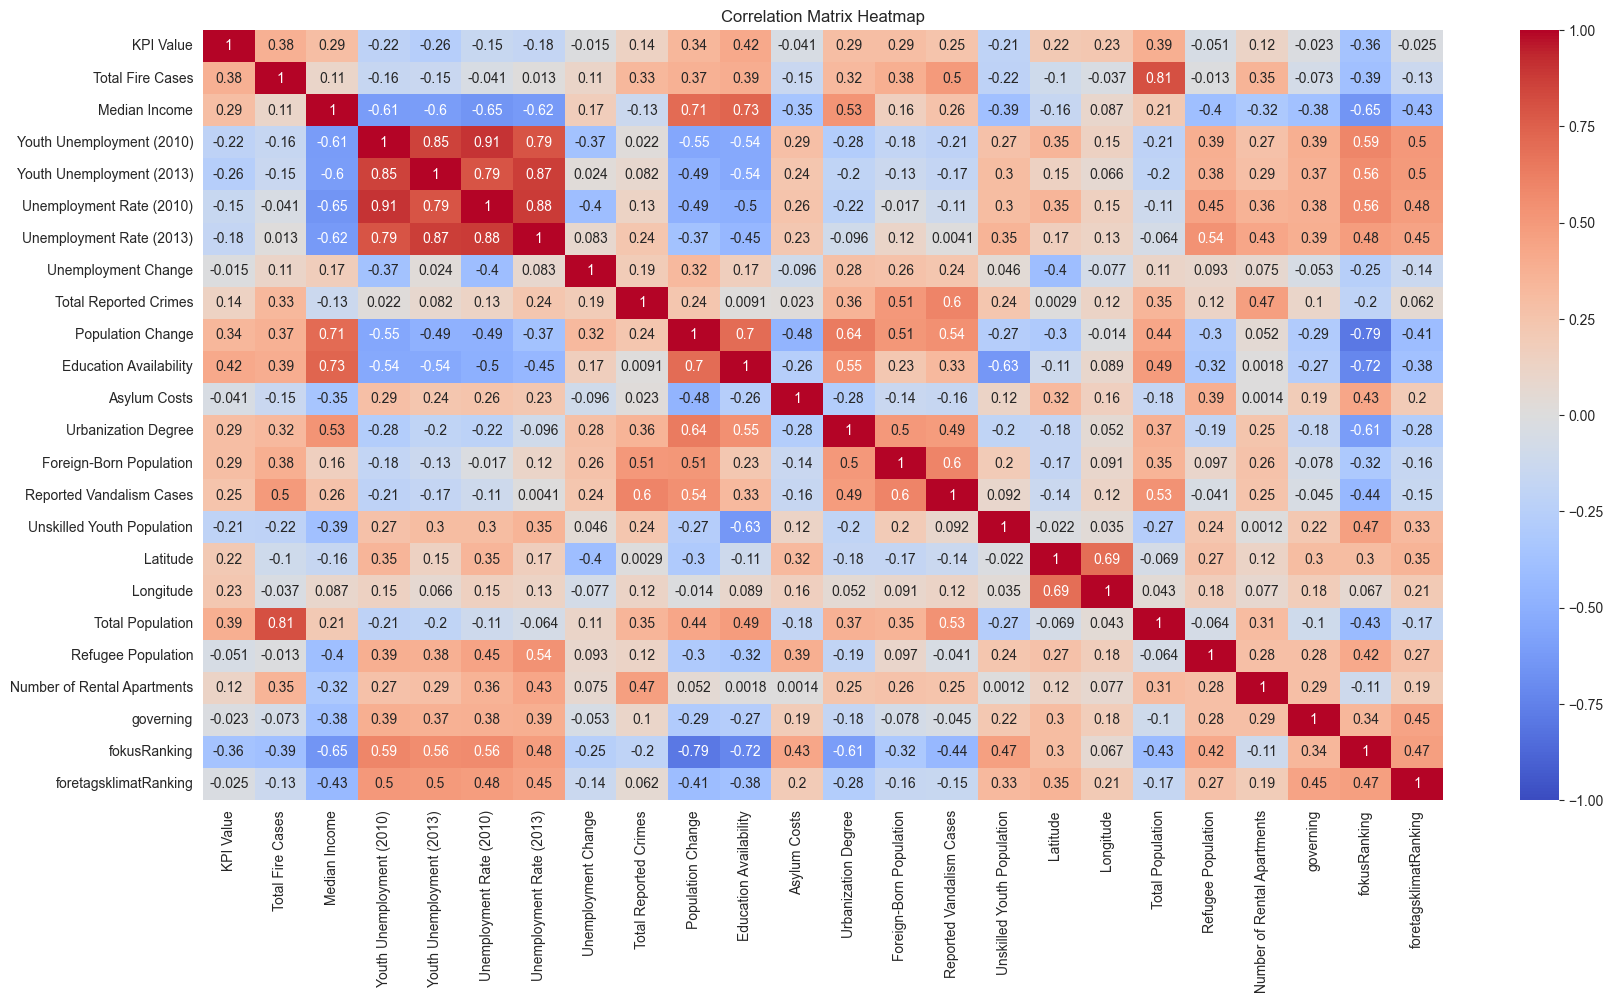

In [52]:
numeric_data = merged_data.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_matrix.png', bbox_inches='tight')
plt.show()

Strong Positive Correlations
Unemployment Rate (2010) and Unemployment Rate (2013) (0.88)
Indicates consistent unemployment trends over time.
Suggests that areas with high unemployment in 2010 continued to face similar challenges in 2013.

Total Reported Crimes and Total Crime Count (0.81)
A strong relationship suggests that crime reporting is proportional to actual crime rates.


Median Income and Education Availability (0.73)
Higher education levels correlate with higher median income, reinforcing the link between education and economic status.

Population Change and Urbanization Level (0.64)
Suggests more urbanized areas tend to have higher growth rates.

Foreign Born Population and Refugee Population (0.54)
Municipalities with a high foreign-born population also have higher refugee numbers, likely due to migration policies.

Number of Rental Apartments and Population Change (0.47)
More rental apartments correlate with growing populations, indicating housing availability attracts more residents.

Fokus Ranking and Foretagsklimat Ranking (0.45)
Municipalities with good business climate rankings also rank well in Fokus Ranking.

Strong Negative Correlations
Median Income and Unemployment (2010, -0.61)
Higher median income is linked to lower unemployment rates.

Urbanization Level and Foreign-Born Population (-0.61)
Higher urbanization levels tend to have fewer foreign-born residents, indicating suburban areas attract more migration.

Education Availability and Unemployment (2010, -0.63)
Areas with better education access have lower unemployment, highlighting the impact of education on job opportunities.

Urbanization and Population Change (-0.79)
More urbanized municipalities tend to have lower population growth, possibly due to higher living costs limiting expansion.

Asylum Costs and Unemployment Change (-0.28)
Areas with higher asylum costs tend to have more stable unemployment rates, meaning asylum-related policies don’t significantly impact job markets.



School Fire Cases vs Other Features

Total Fire Cases  vs KPI (0.38)

Total Fire Cases vs Population Change (0.37)

Total Fire Cases vs Education Availablity (0.39)

Total Fire Cases vs Foreign Born (0.38)

Total Fire Cases vs Reported Vandalism cases (0.5)

Total Fire Cases vs Rental Appartment (0.35)

Total Fire Cases vs fokus Ranking (-0.39)



Total Fire Cases and total Population (0.81)
More populated areas tend to have higher fire incidents, possibly due to higher building density.

Total Fire Cases and Urbanization Level (0.36)
Urban areas report more fire incidents, possibly due to industrial and commercial structures.

Total Fire Cases and Total Reported Crime (0.33)
Crime-prone areas also show higher fire cases, suggesting possible arson-related incidents.


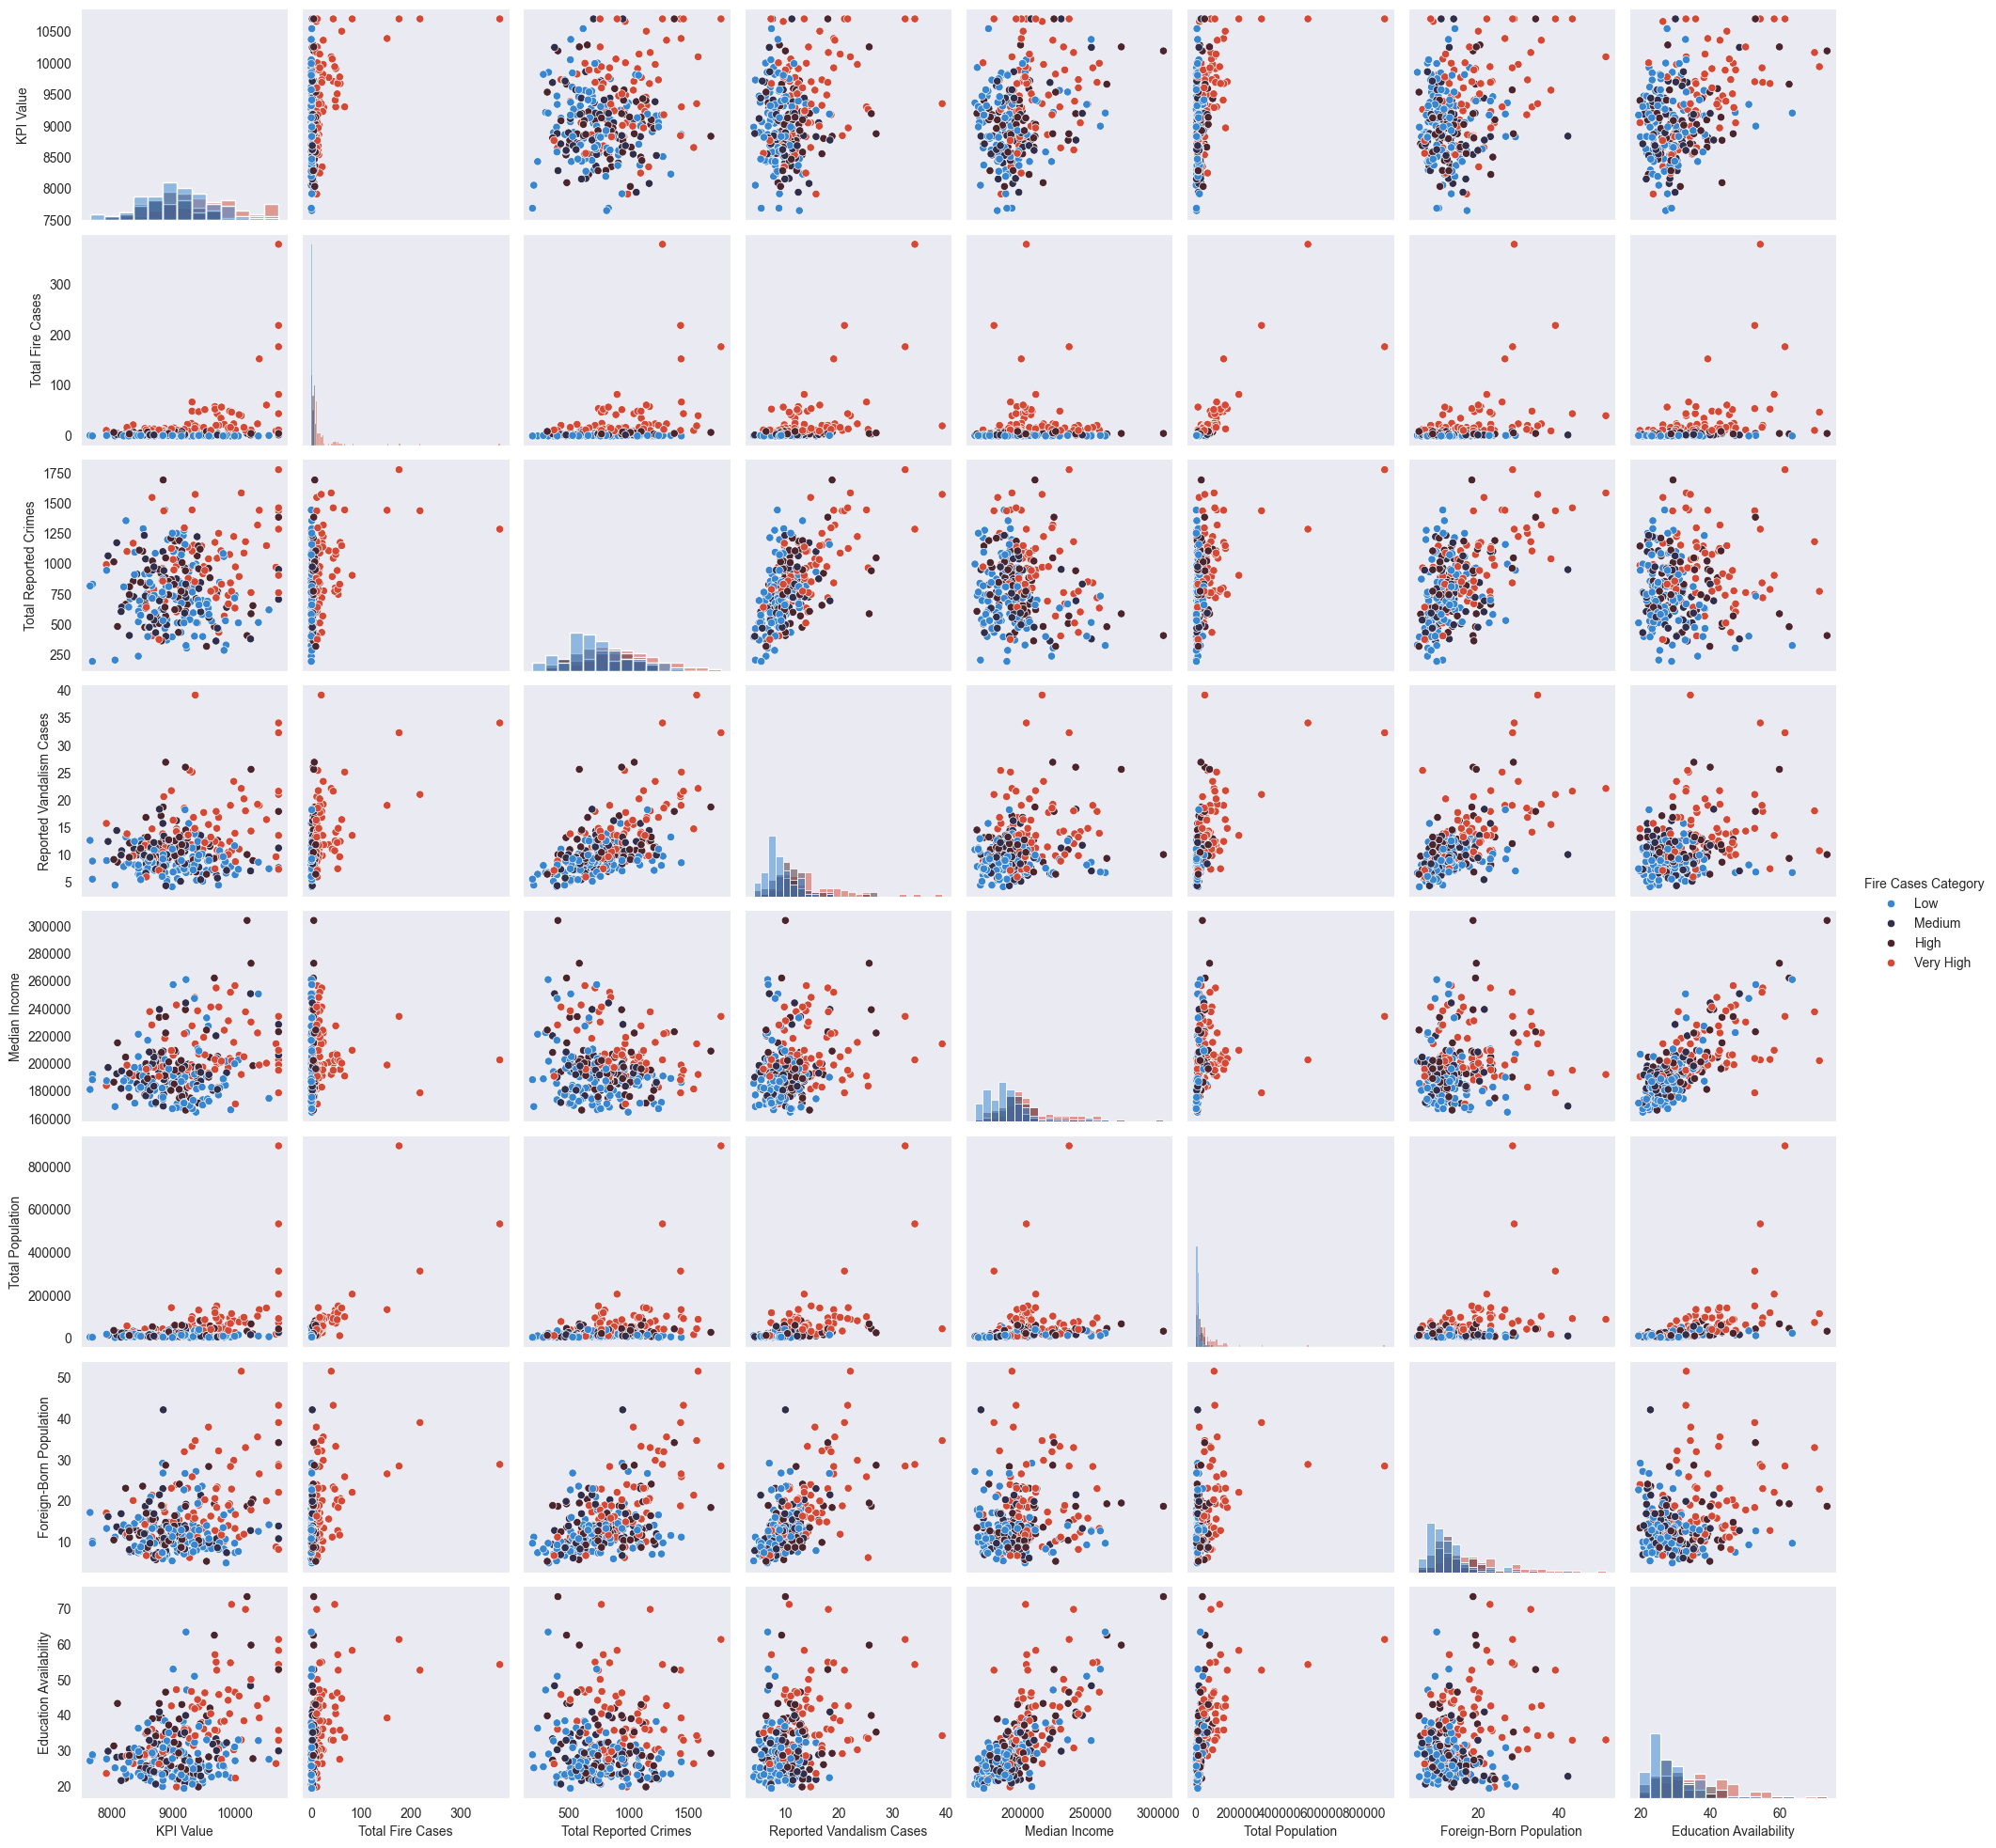

In [67]:
#palette="YlOrBr"
#palette="icefire"
# palette="cubehelix"
sns.color_palette("icefire", as_cmap=True)
# 🔹 Generating scatterplots
features = [
    "KPI Value",
    "Total Fire Cases", 
    "Total Reported Crimes", 
    "Reported Vandalism Cases", 
    "Median Income",
    "Total Population",
    "Foreign-Born Population",
    "Education Availability"
]
sns.set_style('dark')
df = merged_data[features].dropna()
df['Fire Cases Category'] = pd.qcut(merged_data['Total Fire Cases'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.pairplot(df, hue='Fire Cases Category', diag_kind='hist', palette="icefire")
plt.savefig('scatter_plot.png', bbox_inches='tight')

Total Fire Cases vs. Total Reported Crimes (Expected Positive Correlation)

To investigate if higher crime rates directly contribute to more fire incidents.
Total Fire Cases vs. Reported Vandalism Cases (Expected Positive Correlation)

Since vandalism could include arson, we check if more vandalism leads to more fires.
Total Fire Cases vs. Urbanization Degree (Expected Positive Correlation)

To explore if urban areas have more fires due to dense populations and industrial activity.
Total Fire Cases vs. Median Income (Expected Negative Correlation)

To check if lower-income municipalities experience more fires due to weaker safety regulations or poor infrastructure.
Total Fire Cases vs. Number of Rental Apartments (Expected Positive Correlation)

To test whether municipalities with more rental units see higher fire risks, possibly due to low maintenance and safety compliance

Total Fire Cases vs. Total Population (Strongest Positive Correlation, +0.81)

To determine whether fire cases scale directly with population size, or if some municipalities have disproportionately higher fires per capita.
Total Fire Cases vs. Unskilled Youth Population (Moderate Negative Correlation)

To check if areas with a higher proportion of unskilled youth have fewer fire incidents, which could mean fire hazards are more common in better-developed areas.
Total Fire Cases vs. Foreign-Born Population (Moderate Positive Correlation)

To explore if municipalities with more immigrants experience higher or lower fire risks, possibly due to housing conditions and economic disparities.

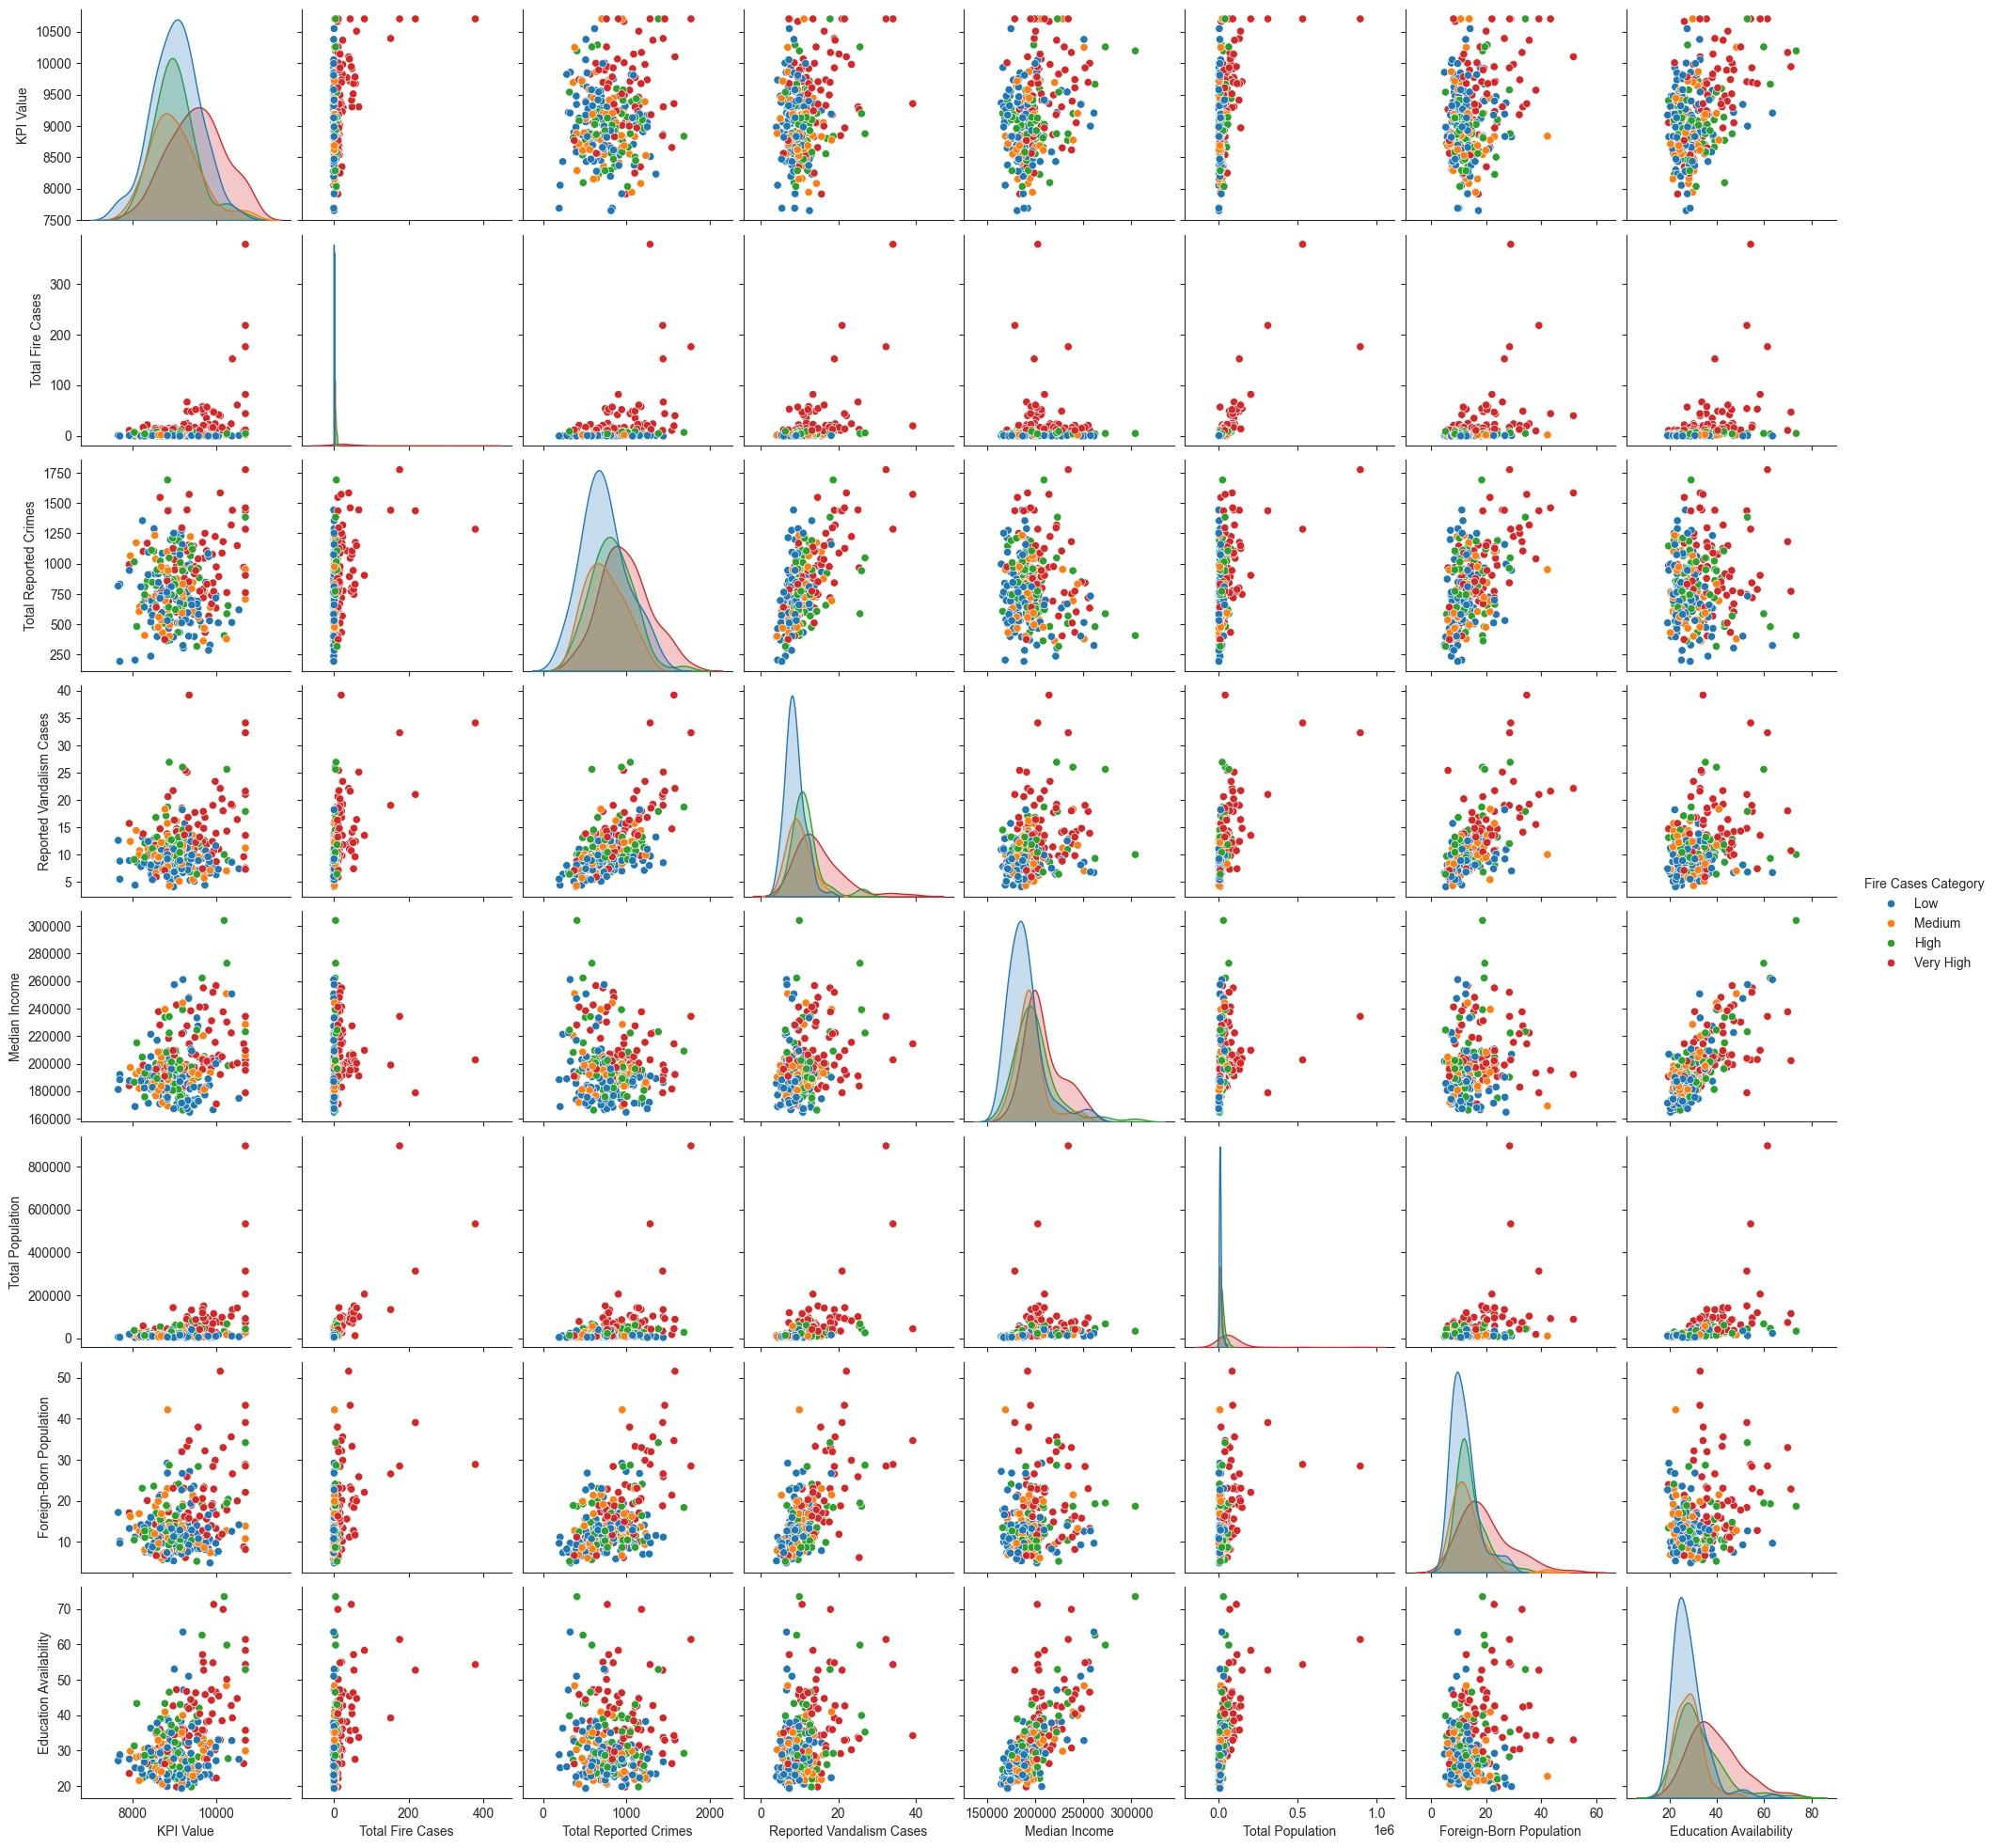

In [68]:
data = merged_data[features].dropna()
sns.set_style('ticks')
data['Fire Cases Category'] = pd.qcut(merged_data['Total Fire Cases'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
sns.pairplot(data, hue='Fire Cases Category')
plt.savefig('scatter_plot_ticks.png', bbox_inches='tight')

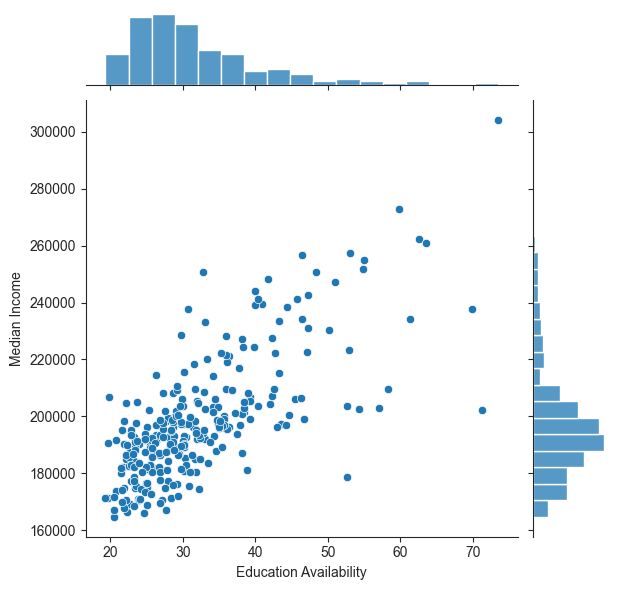

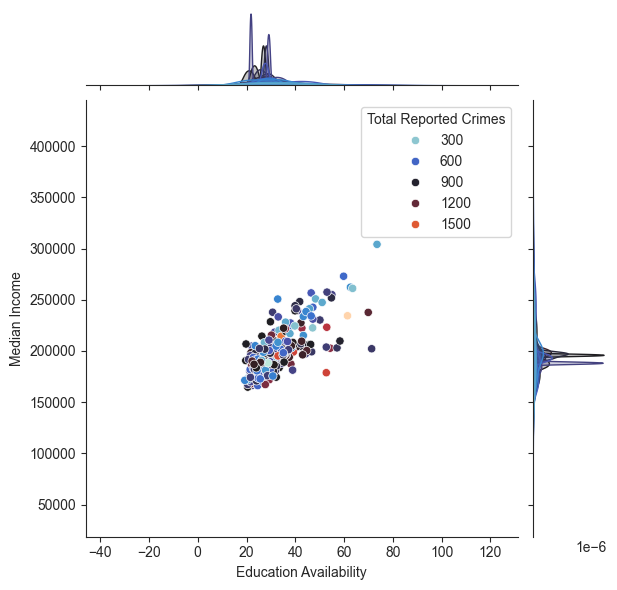

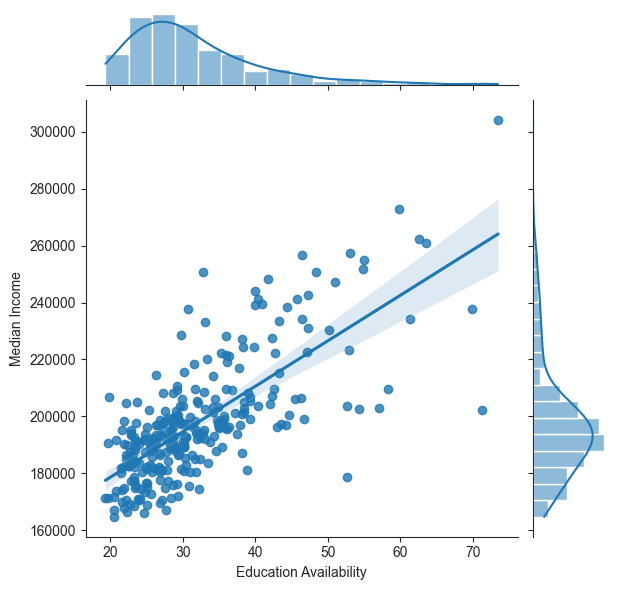

In [81]:
#Example: Joint distribution plots
# easiest version:
sns.jointplot(data=merged_data, x='Education Availability', y='Median Income')
plt.savefig('scatter_plot_scatter_1.png', bbox_inches='tight')
# adding hue='Life_expectancy' with palette="icefire"
sns.jointplot(data=merged_data, x='Education Availability', y='Median Income', hue='Total Reported Crimes',palette="icefire")
plt.savefig('scatter_plot_scatter_2.png', bbox_inches='tight')
# adding some automatic kernel density estimation and regression
sns.jointplot(data=merged_data, x='Education Availability', y='Median Income', kind='reg')
plt.savefig('scatter_plot_scatter_3.png', bbox_inches='tight')

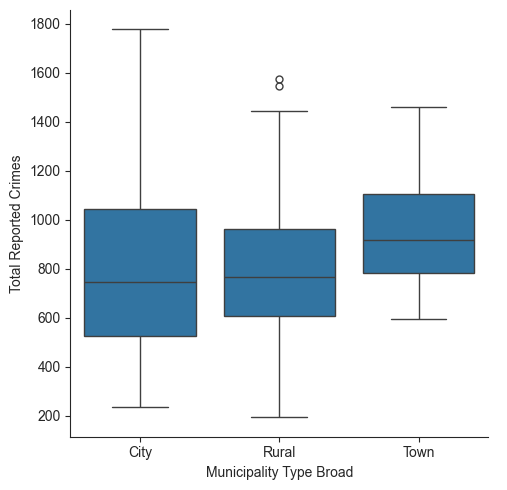

In [56]:
sns.catplot(data=merged_data,x="Municipality Type Broad",  y="Total Reported Crimes", kind="box")
plt.savefig('boxplot.png', bbox_inches='tight')

In [57]:
#In our cases, city and town seems similar so we will merge those two for our cases
# Combine 'town' and 'city' into 'urban'
merged_data['Municipality Type Broad'] = merged_data['Municipality Type Broad'].replace({'Town': 'Urban', 'City': 'Urban'})

print(merged_data['Municipality Type Broad'].value_counts())


Municipality Type Broad
Rural    196
Urban     94
Name: count, dtype: int64


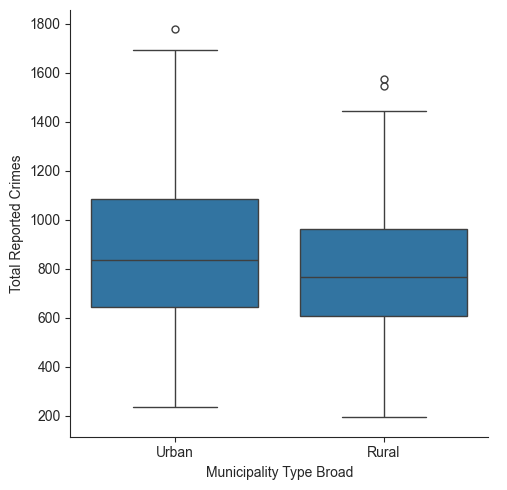

In [58]:
sns.catplot(data=merged_data,x="Municipality Type Broad",  y="Total Reported Crimes", kind="box")
plt.savefig('boxplot.png', bbox_inches='tight')

     Municipality  Year  Cases
0             Ale  1998      0
1             Ale  1999      0
2             Ale  2000      1
3             Ale  2001      1
4             Ale  2002      0
...           ...   ...    ...
4919   Övertorneå  2010      0
4920   Övertorneå  2011      0
4921   Övertorneå  2012      1
4922   Övertorneå  2013      0
4923   Övertorneå  2014      0

[4924 rows x 3 columns]
Index(['Municipality Name', 'Year', 'Total Fire Cases', 'Municipality Type'], dtype='object')


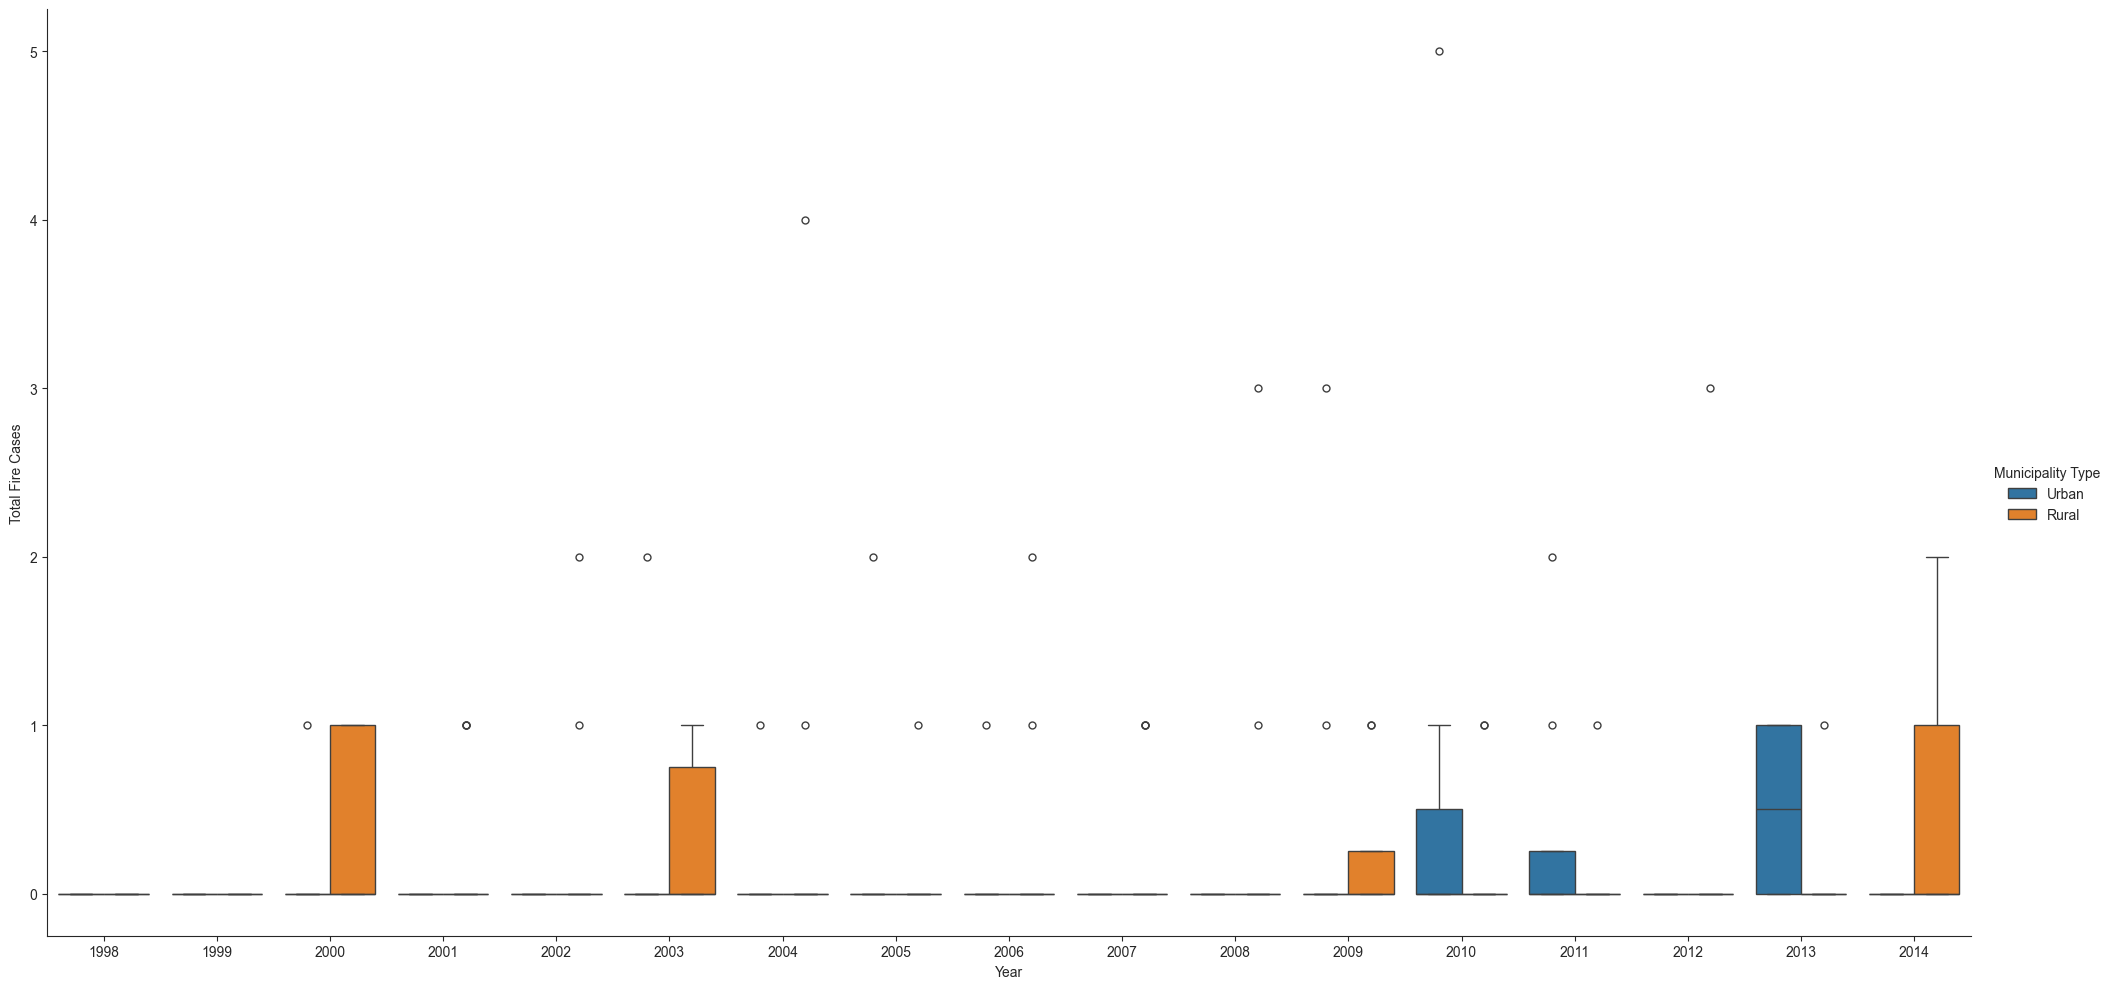

In [59]:
# Selecting relevant features and removing NaN values

features = ['Municipality', 'Cases', 'Year']
data = school_fire_cases_1998_2014[features].dropna()
# Merging 'Municipality Type Broad' from merged_data
data = data.groupby(['Municipality', 'Year'])['Cases'].sum().reset_index()
print(data)
data['Municipality_Type'] = merged_data['Municipality Type Broad']

data.rename(columns={
    'Municipality': 'Municipality Name',
    'Cases': 'Total Fire Cases',
    'Municipality_Type': 'Municipality Type',
}, inplace=True)

print(data.columns)
sns.catplot(data=data, x="Year",  y="Total Fire Cases", kind="box", hue='Municipality Type', height=10, aspect=2)
plt.savefig('year_wise_fire_cases.png', bbox_inches='tight')

Hypothesis: Is there any difference regarding the total fire cases between urban an rural area. 
How can we know if this is statistically significant?
Is there any imbalance between data for rural and urban area.(Rural    196, Urban     94)

In [60]:
 #comparing the difference in the average of life-expectancy between developed and developing countries:
# Calculate total fire cases in urban areas
total_fire_urban = merged_data.loc[merged_data['Municipality Type Broad'] == 'Urban', 'Total Fire Cases'].sum()
total_urban_areas = (merged_data['Municipality Type Broad'] == 'Urban').sum()

# Calculate total fire cases in rural areas
total_fire_rural = merged_data.loc[merged_data['Municipality Type Broad'] == 'Rural', 'Total Fire Cases'].sum()
total_rural_areas = (merged_data['Municipality Type Broad'] == 'Rural').sum()

# Print the results
print(f'Total fire cases in urban areas: {total_fire_urban}, Total urban areas: {total_urban_areas}')
print(f'Total fire cases in rural areas: {total_fire_rural}, Total rural areas: {total_rural_areas}')

Total fire cases in urban areas: 2411, Total urban areas: 94
Total fire cases in rural areas: 677, Total rural areas: 196


In [61]:
from scipy import stats

# Extract individual fire case data for urban and rural areas
urban_fire_cases = merged_data.loc[merged_data['Municipality Type Broad'] == 'Urban', 'Total Fire Cases']
rural_fire_cases = merged_data.loc[merged_data['Municipality Type Broad'] == 'Rural', 'Total Fire Cases']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(urban_fire_cases, rural_fire_cases, equal_var=False)

# Print results
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")


T-test Statistic: 4.238708417893797, P-value: 5.26454533485754e-05


P-value (5.2645e-05) is much smaller than 0.05, meaning there is a statistically significant difference between fire cases in urban and rural areas.
T-statistic (4.2387) is positive, meaning the mean fire cases in urban areas are significantly higher than in rural areas.
This suggests that fire incidents are not occurring at the same rate in urban and rural areas.

The fire cases in urban areas are significantly different (higher) than in rural areas.
This is a strong statistical result that rejects the null hypothesis (H₀: No difference between urban and rural fire cases).

In [62]:
d_out = open('important_feature', 'wb')
pickle.dump(merged_data, d_out)
d_out.close()

In [63]:
d_in = open('important_feature', 'rb')
data = pickle.load(d_in)
d_out.close()

In [64]:
data.head()

municipality     KPI Value  Total Fire Cases  Median Income  \
0          Ale   8861.862129                15         218334   
1     Alingsås   8817.898117                 5         206737   
2      Alvesta  10291.189532                 4         198482   
3        Aneby   7691.469659                 1         192114   
4       Arboga   8667.671434                 4         189118   

   Youth Unemployment (2010)  Youth Unemployment (2013)  \
0                        8.5                        7.3   
1                        9.4                        8.8   
2                       11.7                       13.1   
3                       10.1                       10.5   
4                       14.4                       11.2   

   Unemployment Rate (2010)  Unemployment Rate (2013)  Unemployment Change  \
0                       6.8                       5.5                 -1.3   
1                       7.4                       6.3                 -1.1   
2                       7.9                       8.9                  1.0   
3                       7.4                       6.6                 -0.8   
4                      10.1                       8.9                 -1.2   

   Total Reported Crimes  ...  Unskilled Youth Population   Latitude  \
0                    691  ...                        11.8  57.841175   
1                    862  ...                         9.0  57.930021   
2                    654  ...                        10.9  56.899210   
3                    831  ...                         7.4  57.838521   
4                    726  ...                        12.3  59.393688   

   Longitude  Total Population  Municipality Type Broad  Refugee Population  \
0  12.029249             28074                    Urban                 7.0   
1  12.536211             38619                    Rural                16.9   
2  14.556001             19280                    Rural                46.5   
3  14.817802              6375                    Rural                27.1   
4  15.838175             13493                    Rural                20.2   

   Number of Rental Apartments  governing  fokusRanking  foretagsklimatRanking  
0                        107.9          2            61                     61  
1                        160.0          0            48                    173  
2                        142.7          2           126                    179  
3                        120.3          0           187                     89  
4                        233.4          2           190                    196  

[5 rows x 26 columns]

In [72]:
diff = data.compare(merged_data, align_axis = 0)
print("Difference between two DataFrames:\n", diff)

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

In [75]:
print(merged_data['governing'].value_counts())
print(merged_data['governing'].unique())

governing
2    116
0    109
1     65
Name: count, dtype: int64
[2 0 1]


In [74]:
with pd.ExcelWriter('school_fire_total_feature.xlsx') as writer:
    merged_data.to_excel(writer, sheet_name='total_features')